In [ ]:
!pip install country_converter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from country_converter import CountryConverter
import geopandas as gpd



In [ ]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# Importation des données

Importation des données des JO de **Tokyo**

In [ ]:



file_path_athletes2020 = '/content/drive/My Drive/Projet_MIDL_3/DataTokyo/athletes.csv'
file_path_medals2020 = '/content/drive/My Drive/Projet_MIDL_3/DataTokyo/medals.csv'
file_path_coaches2020 = '/content/drive/My Drive/Projet_MIDL_3/DataTokyo/coaches.csv'
file_path_technical_officials2020 = '/content/drive/My Drive/Projet_MIDL_3/DataTokyo/technical_officials.csv'
file_path_medals_total2020 = '/content/drive/My Drive/Projet_MIDL_3/DataTokyo/medals_total.csv'

# Charger le fichier CSV avec pandas
athletes_df_2020 = pd.read_csv(file_path_athletes2020)
medals_df_2020 = pd.read_csv(file_path_medals2020)
coaches_df_2020 = pd.read_csv(file_path_coaches2020)
technical_officials_df_2020 = pd.read_csv(file_path_technical_officials2020)
medals_total_df_2020 = pd.read_csv(file_path_medals_total2020)

Importation des données des JO de Paris

In [ ]:
file_path_athletes2024 = '/content/drive/My Drive/Projet_MIDL_3/DataParis/athletes (1).csv'
file_path_medals2024 = '/content/drive/My Drive/Projet_MIDL_3/DataParis/medals.csv'
file_path_coaches2024 = '/content/drive/My Drive/Projet_MIDL_3/DataParis/coaches.csv'
file_path_technical_officials2024 = '/content/drive/My Drive/Projet_MIDL_3/DataParis/technical_officials.csv'
file_path_medals_total2024 = '/content/drive/My Drive/Projet_MIDL_3/DataParis/medals_total.csv'

# Charger le fichier CSV avec pandas
athletes_df_2024 = pd.read_csv(file_path_athletes2024)
medals_df_2024 = pd.read_csv(file_path_medals2024)
coaches_df_2024 = pd.read_csv(file_path_coaches2024)
technical_officials_df_2024 = pd.read_csv(file_path_technical_officials2024)
medals_total_df_2024 = pd.read_csv(file_path_medals_total2024)

# Pré traitement des données


Le but de cette partie est de traiter les données de2020 et 2024 afin de pouvoir les utiliser sans erreurs par la suite.
L'intérêt est aussi de prendre connaissance des données et devoir la composition des fichiers.

## Pré traitement des données du fichier csv 2020

1. Aperçu des données

In [ ]:

# Afficher les premières lignes des dataframes pour un aperçu initial
# à faire : afficher les premiers enregistrements pour chaque dataset
print("athletes_df_2020")
display(athletes_df_2020.head())
print("coaches_df_2020")
display(coaches_df_2020.head())
print("medals_df_2020")
display(medals_df_2020.head())
print("medals_total_df_2020")
display(medals_total_df_2020.head())
print("technical_officials_df_2020")
display(technical_officials_df_2020.head())



athletes_df_2020


name  short_name  gender  birth_date birth_place  \
0    AALERUD Katrine   AALERUD K  Female  1994-12-04      VESTBY   
1        ABAD Nestor      ABAD N    Male  1993-03-29       ALCOI   
2  ABAGNALE Giovanni  ABAGNALE G    Male  1995-01-11    GRAGNANO   
3     ABALDE Alberto    ABALDE A    Male  1995-12-15      FERROL   
4      ABALDE Tamara    ABALDE T  Female  1989-02-06        VIGO   

  birth_country country country_code           discipline discipline_code  \
0        Norway  Norway          NOR         Cycling Road             CRD   
1         Spain   Spain          ESP  Artistic Gymnastics             GAR   
2         Italy   Italy          ITA               Rowing             ROW   
3         Spain   Spain          ESP           Basketball             BKB   
4         Spain   Spain          ESP           Basketball             BKB   

  residence_place residence_country height_m/ft  \
0             NaN               NaN         NaN   
1          MADRID             Spain  1.65/5'4''   
2        SABAUDIA             Italy  1.98/6'5''   
3             NaN               NaN  2.00/6'6''   
4             NaN               NaN  1.92/6'3''   

                                                 url  
0  ../../../en/results/cycling-road/athlete-profi...  
1  ../../../en/results/artistic-gymnastics/athlet...  
2  ../../../en/results/rowing/athlete-profile-n13...  
3  ../../../en/results/basketball/athlete-profile...  
4  ../../../en/results/basketball/athlete-profile...

coaches_df_2020


name    short_name gender  birth_date country_code  discipline  \
0  ABDELMAGID Wael  ABDELMAGID W   Male  1982-08-02          EGY    Football   
1        ABE Junya         ABE J   Male  1990-07-25          JPN  Volleyball   
2    ABE Katsuhiko         ABE K   Male  1979-09-23          JPN  Basketball   
3     ADAMA Cherif       ADAMA C   Male  1962-05-06          CIV    Football   
4       AGEBA Yuya       AGEBA Y   Male  1983-09-30          JPN  Volleyball   

     function event                                                url  
0  Head Coach   NaN  ../../../en/results/football/athlete-profile-n...  
1  Head Coach   NaN  ../../../en/results/volleyball/athlete-profile...  
2       Coach   NaN  ../../../en/results/basketball/athlete-profile...  
3  Head Coach   NaN  ../../../en/results/football/athlete-profile-n...  
4  Head Coach   NaN  ../../../en/results/volleyball/athlete-profile...

medals_df_2020


medal_type  medal_code             medal_date athlete_short_name  \
0    Gold Medal           1  2021-07-24 00:00:00.0             KIM JD   
1    Gold Medal           1  2021-07-24 00:00:00.0               AN S   
2  Silver Medal           2  2021-07-24 00:00:00.0       SCHLOESSER G   
3  Silver Medal           2  2021-07-24 00:00:00.0           WIJLER S   
4  Bronze Medal           3  2021-07-24 00:00:00.0          ALVAREZ L   

          athlete_name athlete_sex  \
0          KIM Je Deok           X   
1               AN San           X   
2  SCHLOESSER Gabriela           X   
3         WIJLER Steve           X   
4         ALVAREZ Luis           X   

                                        athlete_link country_code  \
0  ../../../en/results/archery/athlete-profile-n1...          KOR   
1  ../../../en/results/archery/athlete-profile-n1...          KOR   
2  ../../../en/results/archery/athlete-profile-n1...          NED   
3  ../../../en/results/archery/athlete-profile-n1...          NED   
4  ../../../en/results/archery/athlete-profile-n1...          MEX   

  discipline_code       event            country discipline  
0             ARC  Mixed Team  Republic of Korea    Archery  
1             ARC  Mixed Team  Republic of Korea    Archery  
2             ARC  Mixed Team        Netherlands    Archery  
3             ARC  Mixed Team        Netherlands    Archery  
4             ARC  Mixed Team             Mexico    Archery

medals_total_df_2020


Rank Country Code  Gold Medal  Silver Medal  Bronze Medal  Total  \
0     1          USA          39            41            33    113   
1     2          CHN          38            32            18     88   
2     3          JPN          27            14            17     58   
3     4          GBR          22            21            22     65   
4     5          ROC          20            28            23     71   

                      Country  
0    United States of America  
1  People's Republic of China  
2                       Japan  
3               Great Britain  
4                         ROC

technical_officials_df_2020


name     short_name  gender  birth_date     country  \
0                ABAEVA Elena       ABAEVA E  Female  1966-04-21  Uzbekistan   
1                ABBAR Bachir        ABBAR B    Male  1965-05-03     Morocco   
2         ABDELLATIF Makfouni   ABDELLATIF M    Male  1972-11-23     Morocco   
3                    ABE Miya          ABE M  Female  1992-10-27       Japan   
4  ACIGA FULA Antonio Stephen  ACIGA FULA AS    Male  1957-11-28      Uganda   

         discipline function  \
0         Wrestling    Judge   
1            Boxing    Judge   
2            Boxing    Judge   
3  Beach Volleyball  Referee   
4            Boxing    Judge   

                                                 url  
0  ../../../en/results/wrestling/athlete-profile-...  
1  ../../../en/results/boxing/athlete-profile-n15...  
2  ../../../en/results/boxing/athlete-profile-n15...  
3  ../../../en/results/beach-volleyball/athlete-p...  
4  ../../../en/results/boxing/athlete-profile-n15...

2. Vérification des valeurs manquantes

création d'une fonction qui génère un graphique du pourcentage de données absentes en fonctions des colonnes

In [ ]:
# Fonction pour afficher un graphique des données manquantes
def plot_missing_data_without_0(df, df_name):
    # Calculer le pourcentage de données manquantes
    missing_percentage = df.isnull().mean() * 100

    # Inclure toutes les colonnes, même celles avec 0% de données manquantes
    missing_percentage = missing_percentage.sort_values(ascending=False)

    # Création du graphique
    plt.figure(figsize=(12, 6))
    plt.bar(missing_percentage.index, missing_percentage.values, color='skyblue', edgecolor='black', alpha=0.8)
    plt.ylabel('Pourcentage de données manquantes (%)', fontsize=12)
    plt.xlabel('Colonnes', fontsize=12)
    plt.title(f'Pourcentage de données manquantes par colonne dans {df_name}', fontsize=14)
    plt.ylim(0, 100)  # Fixer l'échelle des ordonnées à 100
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation des noms des colonnes pour une meilleure lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Fonction pour afficher un graphique des données manquantes en comptabilisant les 0
def plot_missing_data_with_0(df, df_name):
    # Remplacement des 0 par NaN pour les traiter comme manquants
    df_with_nan = df.replace(0, np.nan)

    # Calculer le pourcentage de données manquantes (NaN et anciens zéros)
    missing_percentage = df_with_nan.isnull().mean() * 100

    # Inclure toutes les colonnes, même celles avec 0% de données manquantes
    missing_percentage = missing_percentage.sort_values(ascending=False)

    # Création du graphique
    plt.figure(figsize=(12, 6))
    plt.bar(missing_percentage.index, missing_percentage.values, color='skyblue', edgecolor='black', alpha=0.8)
    plt.ylabel('Pourcentage de données manquantes (%)', fontsize=12)
    plt.xlabel('Colonnes', fontsize=12)
    plt.title(f'Pourcentage de données manquantes par colonne dans {df_name}', fontsize=14)
    plt.ylim(0, 100)  # Fixer l'échelle des ordonnées à 100
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation des noms des colonnes pour une meilleure lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()










Graphique des absences de données des différents fichiers 2020

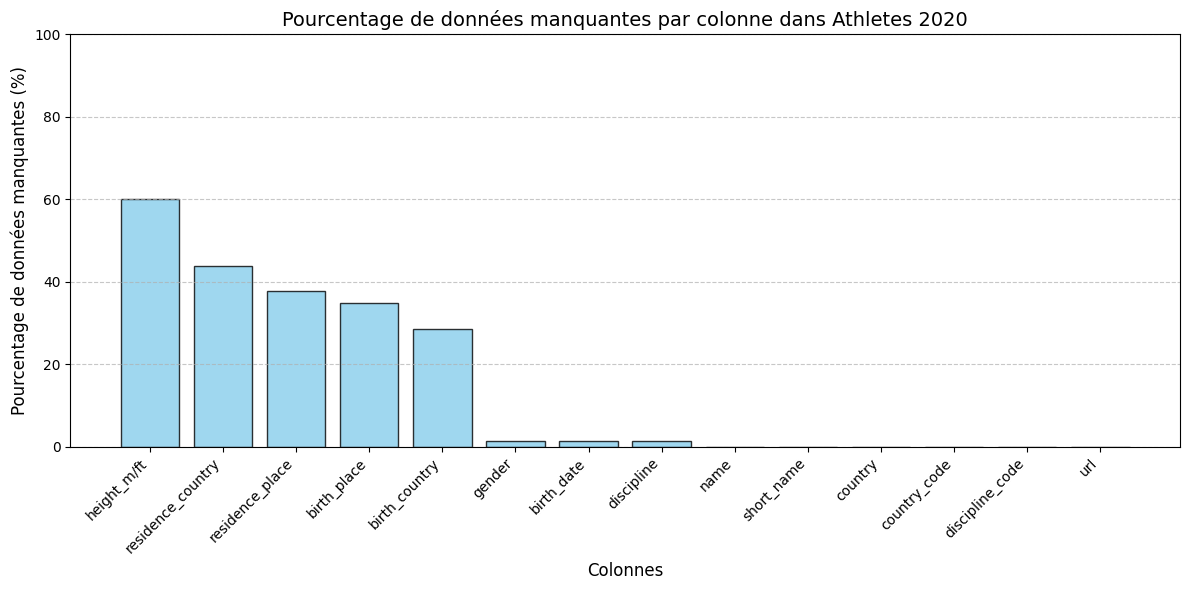

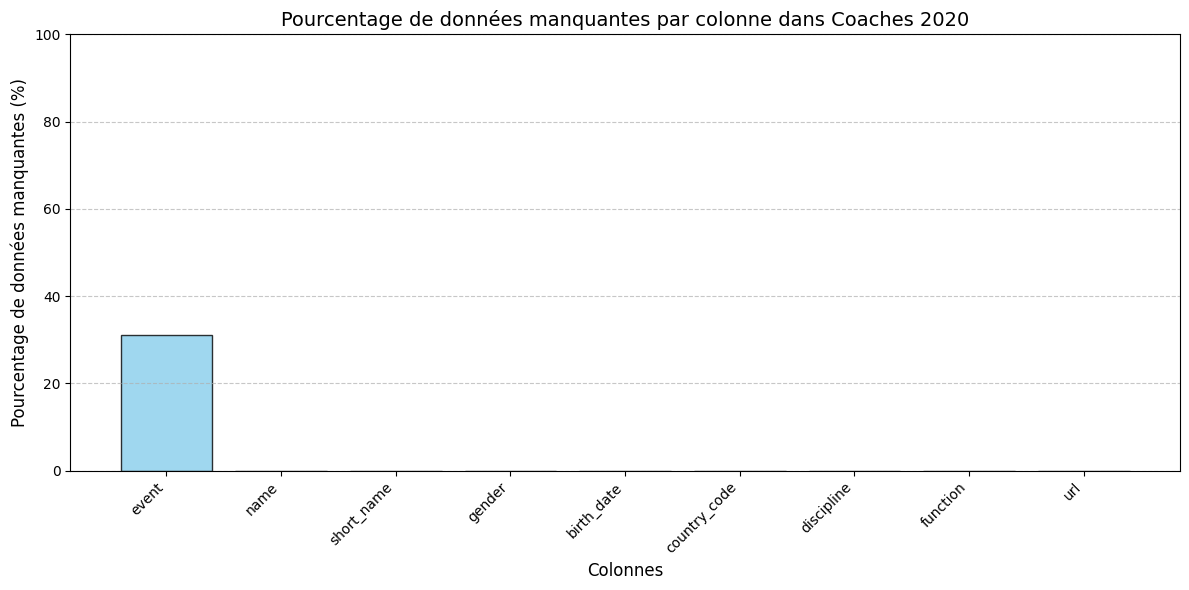

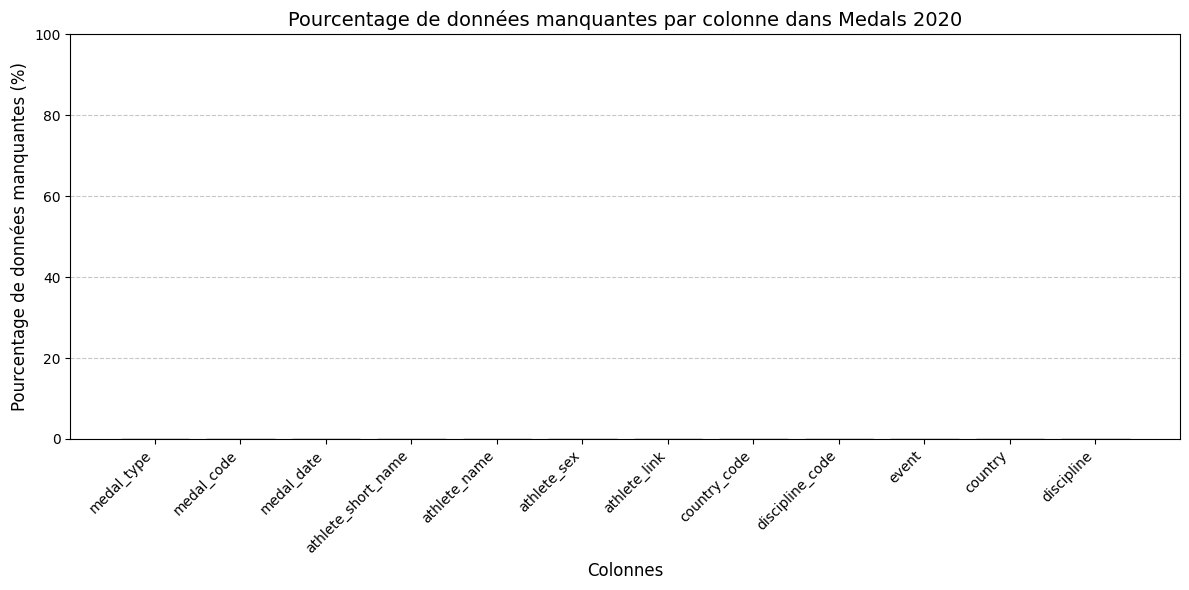

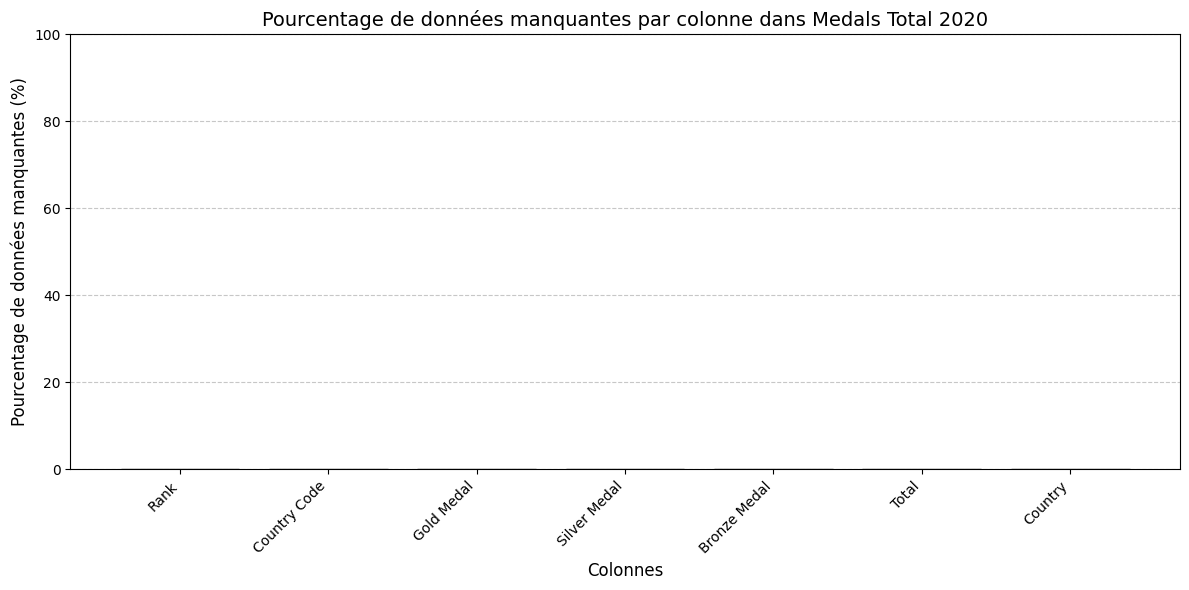

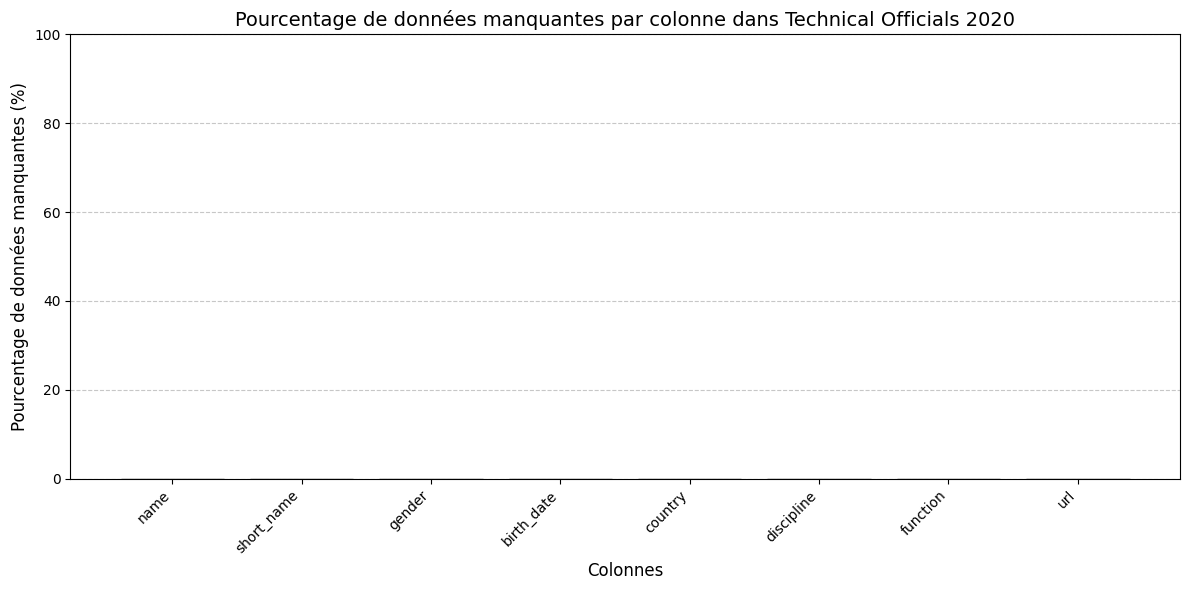

In [ ]:
plot_missing_data_with_0(athletes_df_2020, "Athletes 2020")
plot_missing_data_with_0(coaches_df_2020, "Coaches 2020")
plot_missing_data_without_0(medals_df_2020, "Medals 2020")
plot_missing_data_without_0(medals_total_df_2020, "Medals Total 2020")
plot_missing_data_with_0(technical_officials_df_2020, "Technical Officials 2020")


2. Vérification des valeurs manquantes

In [ ]:
# Étape 1 : Identification des valeurs manquantes
def display_missing_data(df, df_name):
    missing_percentage = df.isnull().mean() * 100
    print(f"Pourcentage de données manquantes dans {df_name}:")
    print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

def handle_missing_data(df, strategies):
    """
    Gère les valeurs manquantes selon une stratégie donnée pour chaque colonne.

    Parameters:
        df (pd.DataFrame): Le dataframe à traiter.
        strategies (dict): Dictionnaire contenant les colonnes comme clés et la méthode comme valeur.
                           Méthodes possibles : "mean", "median", "mode", "drop_column", "drop_rows".
    Returns:
        pd.DataFrame: Le dataframe avec les valeurs manquantes gérées.
    """
    for column, method in strategies.items():
        if column in df.columns:
            if method == "mean":
                df[column].fillna(df[column].mean(), inplace=True)
            elif method == "median":
                df[column].fillna(df[column].median(), inplace=True)
            elif method == "drop_column":
                df.drop(column, axis=1, inplace=True)
            elif method == "drop_rows":
                df.dropna(subset=[column], inplace=True)
    return df

# Étape 3 : Appliquer la gestion des valeurs manquantes
# Exemple pour Tokyo 2020
display_missing_data(athletes_df_2020, "Athletes 2020")
display_missing_data(medals_df_2020, "Medals 2020")

# Étape 1 : Convertir la colonne `birth_date` en format date
athletes_df_2020['birth_date'] = pd.to_datetime(athletes_df_2020['birth_date'], errors='coerce')

# Étape 2 : Définir les stratégies de gestion des valeurs manquantes
strategies_2020 = {
    "gender": "drop_rows",         # Supprimer les lignes où "gender" est manquant
    "birth_date": "median",        # Remplir avec la médiane des dates
    "discipline": "drop_rows",     # Supprimer les lignes où "discipline" est manquant
    "height_m/ft": "drop_column",  # Supprimer toute la colonne
    "residence_country": "drop_column",  # Supprimer toute la colonne
    "residence_place": "drop_column",    # Supprimer toute la colonne
    "birth_place": "drop_column"  ,      # Supprimer toute la colonne
    "birth_country": "drop_column"
}

# Étape 3 : Appliquer la gestion des valeurs manquantes
athletes_df_2020 = handle_missing_data(athletes_df_2020, strategies_2020)

medals_df_2020 = handle_missing_data(medals_df_2020, {"Country": "mode"})  # Exemple pour une colonne

# Vérification après gestion
print("Données manquantes après gestion :")
print(athletes_df_2020.isnull().sum())
print(medals_df_2020.isnull().sum())


Pourcentage de données manquantes dans Athletes 2020:
height_m/ft          60.063487
residence_country    43.848662
residence_place      37.808854
birth_place          34.728895
birth_country        28.620453
gender                1.364104
birth_date            1.364104
discipline            1.364104
dtype: float64
Pourcentage de données manquantes dans Medals 2020:
Series([], dtype: float64)
Données manquantes après gestion :
name               0
short_name         0
gender             0
birth_date         0
country            0
country_code       0
discipline         0
discipline_code    0
url                0
dtype: int64
medal_type            0
medal_code            0
medal_date            0
athlete_short_name    0
athlete_name          0
athlete_sex           0
athlete_link          0
country_code          0
discipline_code       0
event                 0
country               0
discipline            0
dtype: int64


<ipython-input-11-0e3a92a02815>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


On voit ici que les données des athlètes de 2020 ont été traitées

## Pré traitement des données du fichier csv 2024

1. Aperçu des données

In [ ]:
display(athletes_df_2024.head())
display(coaches_df_2024.head())
display(medals_df_2024.head())
display(medals_total_df_2024.head())
display(technical_officials_df_2024.head())

code  current               name     name_short            name_tv  \
0  1532872     True   ALEKSANYAN Artur   ALEKSANYAN A   Artur ALEKSANYAN   
1  1532873     True     AMOYAN Malkhas       AMOYAN M     Malkhas AMOYAN   
2  1532874     True    GALSTYAN Slavik     GALSTYAN S    Slavik GALSTYAN   
3  1532944     True  HARUTYUNYAN Arsen  HARUTYUNYAN A  Arsen HARUTYUNYAN   
4  1532945     True    TEVANYAN Vazgen     TEVANYAN V    Vazgen TEVANYAN   

  gender function country_code  country country_long  ...  \
0   Male  Athlete          ARM  Armenia      Armenia  ...   
1   Male  Athlete          ARM  Armenia      Armenia  ...   
2   Male  Athlete          ARM  Armenia      Armenia  ...   
3   Male  Athlete          ARM  Armenia      Armenia  ...   
4   Male  Athlete          ARM  Armenia      Armenia  ...   

                                              family  \
0                          Father, Gevorg Aleksanyan   
1                                                NaN   
2                                                NaN   
3  Wife, Diana (married October 2022). Daughter, ...   
4                 Wife, Sona (married November 2023)   

                         lang  \
0  Armenian, English, Russian   
1                    Armenian   
2                    Armenian   
3                    Armenian   
4           Armenian, Russian   

                                               coach  \
0                    Gevorg Aleksanyan (ARM), father   
1                                                NaN   
2  Personal: Martin Alekhanyan (ARM).<br>National...   
3                      National: Habetnak Kurghinyan   
4                National: Habetnak Kurghinyan (ARM)   

                                              reason  \
0  He followed his father and his uncle into the ...   
1                                                NaN   
2                                                NaN   
3  While doing karate he noticed wrestlers traini...   
4  “My family did not like wrestling very much. A...   

                                                hero  \
0  Footballer Zinedine Zidane (FRA), World Cup wi...   
1                                                NaN   
2                                                NaN   
3  Wrestler Armen Nazaryan (ARM, BUL), two-time O...   
4                                                NaN   

                       influence  \
0  His father, Gevorg Aleksanyan   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

                                          philosophy  \
0  "Wrestling is my life." (mediamax.am. 18 May 2...   
1  "To become a good athlete, you first have to b...   
2                                                NaN   
3  “Nothing is impossible, set goals in front of ...   
4                                                NaN   

                                  sporting_relatives ritual other_sports  
0                                                NaN    NaN          NaN  
1  Uncle, Roman Amoyan (wrestling), 2008 Olympic ...    NaN          NaN  
2                                                NaN    NaN          NaN  
3                                                NaN    NaN          NaN  
4                                                NaN    NaN          NaN  

[5 rows x 36 columns]

code  current                 name  gender    function category  \
0  1533246     True       PEDRERO Ofelia  Female       Coach        C   
1  1535775     True     RADHI SHENAISHIL    Male  Head Coach        C   
2  1536055     True  AFLAKIKHAMSEH Majid    Male       Coach        C   
3  1536059     True      YOUSEFY Mehrdad    Male       Coach        C   
4  1536060     True         MADDAH Minoo  Female       Coach        C   

  country_code  country              country_long        disciplines events  \
0          MEX   Mexico                    Mexico  Artistic Swimming   Team   
1          IRQ     Iraq                      Iraq           Football    Men   
2          IRI  IR Iran  Islamic Republic of Iran          Taekwondo    NaN   
3          IRI  IR Iran  Islamic Republic of Iran          Taekwondo    NaN   
4          IRI  IR Iran  Islamic Republic of Iran          Taekwondo    NaN   

   birth_date  
0  1988-03-28  
1  1965-07-01  
2  1973-08-26  
3  1972-06-12  
4  1976-05-17

medal_type  medal_code  medal_date             name gender    discipline  \
0    Gold Medal         1.0  2024-07-27  Remco EVENEPOEL      M  Cycling Road   
1  Silver Medal         2.0  2024-07-27    Filippo GANNA      M  Cycling Road   
2  Bronze Medal         3.0  2024-07-27    Wout van AERT      M  Cycling Road   
3    Gold Medal         1.0  2024-07-27      Grace BROWN      W  Cycling Road   
4  Silver Medal         2.0  2024-07-27   Anna HENDERSON      W  Cycling Road   

                           event event_type  \
0    Men's Individual Time Trial        ATH   
1    Men's Individual Time Trial        ATH   
2    Men's Individual Time Trial        ATH   
3  Women's Individual Time Trial        ATH   
4  Women's Individual Time Trial        ATH   

                                           url_event     code country_code  \
0  /en/paris-2024/results/cycling-road/men-s-indi...  1903136          BEL   
1  /en/paris-2024/results/cycling-road/men-s-indi...  1923520          ITA   
2  /en/paris-2024/results/cycling-road/men-s-indi...  1903147          BEL   
3  /en/paris-2024/results/cycling-road/women-s-in...  1940173          AUS   
4  /en/paris-2024/results/cycling-road/women-s-in...  1912525          GBR   

         country   country_long  
0        Belgium        Belgium  
1          Italy          Italy  
2        Belgium        Belgium  
3      Australia      Australia  
4  Great Britain  Great Britain

country_code        country                country_long  Gold Medal  \
0          USA  United States    United States of America          40   
1          CHN          China  People's Republic of China          40   
2          JPN          Japan                       Japan          20   
3          AUS      Australia                   Australia          18   
4          FRA         France                      France          16   

   Silver Medal  Bronze Medal  Total  
0            44            42    126  
1            27            24     91  
2            12            13     45  
3            19            16     53  
4            26            22     64

code  current                name  gender function category  \
0  1536406     True  FRATINI Elisabetta  Female  Referee        J   
1  1550583     True         ILIC Corina  Female  Referee        J   
2  1550593     True          MAAFI Ziad    Male  Referee        J   
3  1550642     True         FUMEA Maria  Female    Judge        J   
4  1550643     True         LEUNG Li Li  Female    Judge        J   

  organisation_code organisation                    organisation_long  \
0               ITA        Italy                                Italy   
1               CRO      Croatia                              Croatia   
2               ALG      Algeria                              Algeria   
3               FIG          FIG  International Gymnastics Federation   
4               FIG          FIG  International Gymnastics Federation   

                                         disciplines birth_date  
0                                           ['Judo']        NaN  
1                                           ['Judo']        NaN  
2                                           ['Judo']        NaN  
3  ['Artistic Gymnastics', 'Rhythmic Gymnastics',...        NaN  
4  ['Artistic Gymnastics', 'Rhythmic Gymnastics',...        NaN

2. Vérification des valeurs manquantes

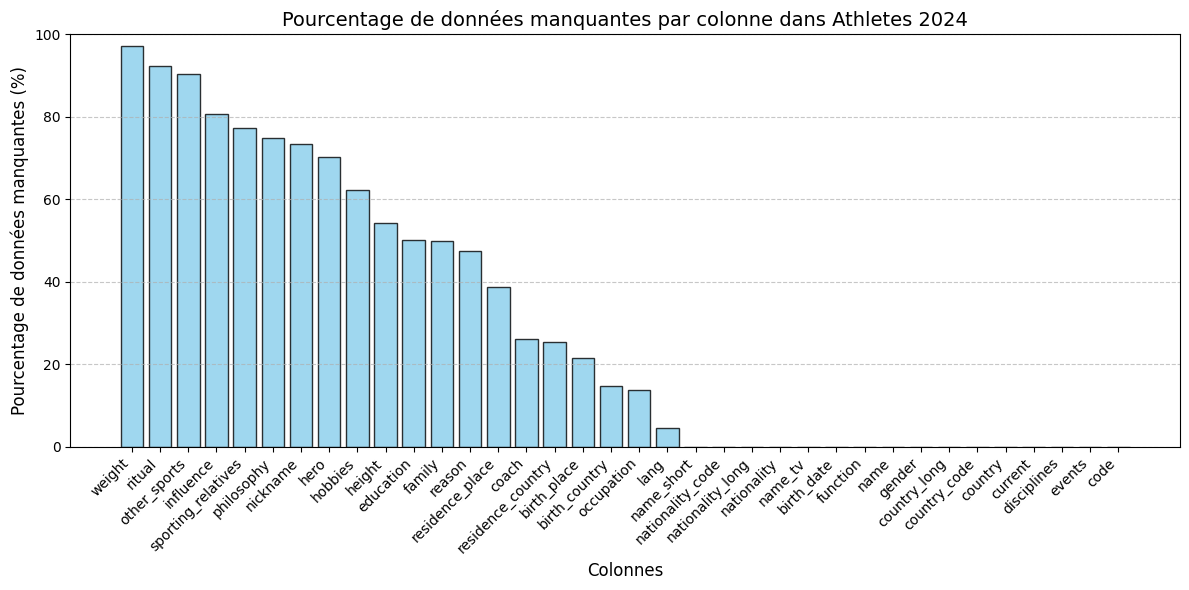

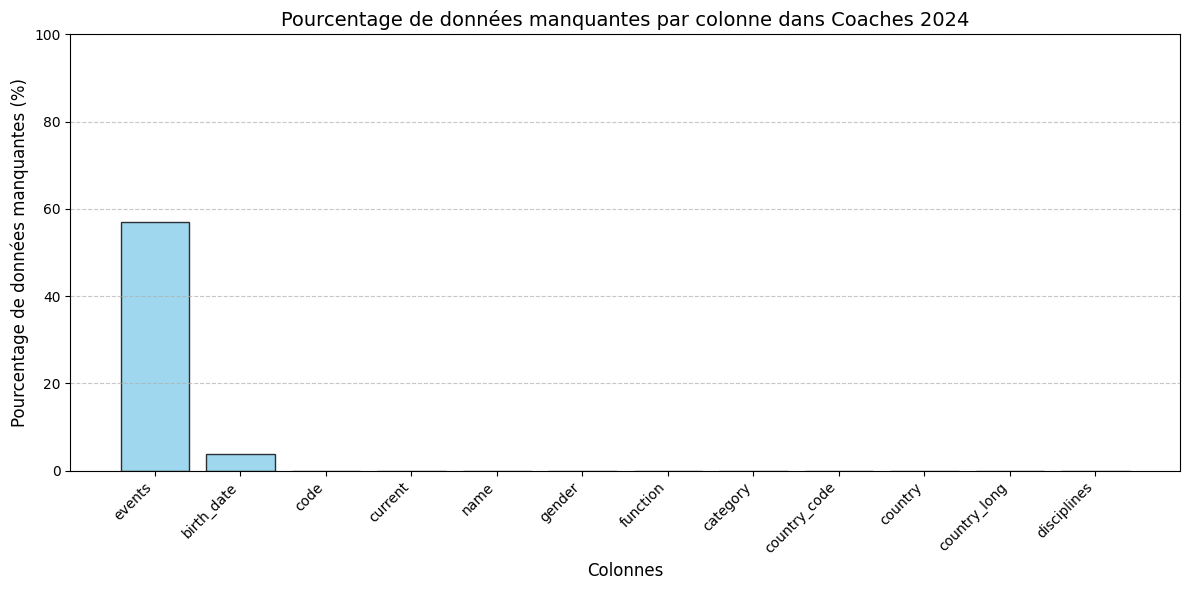

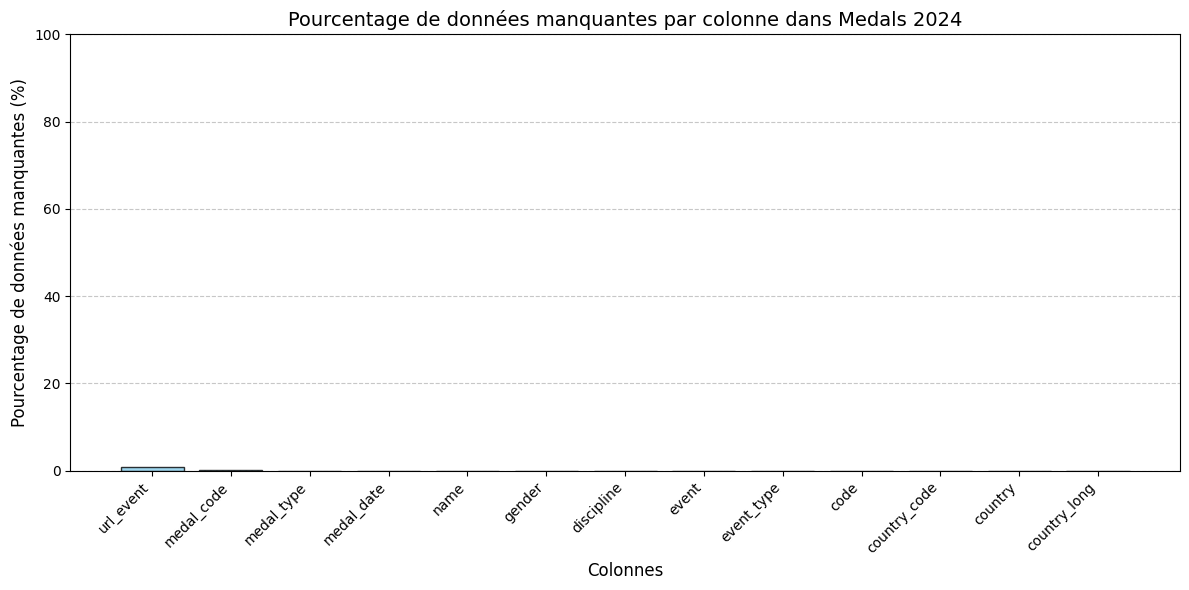

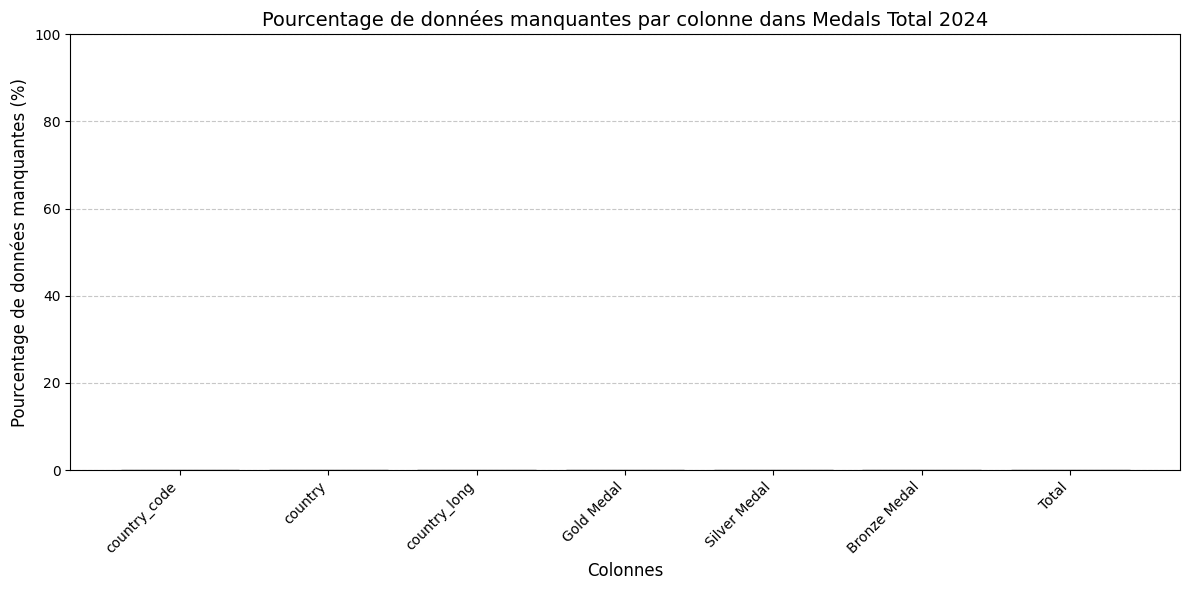

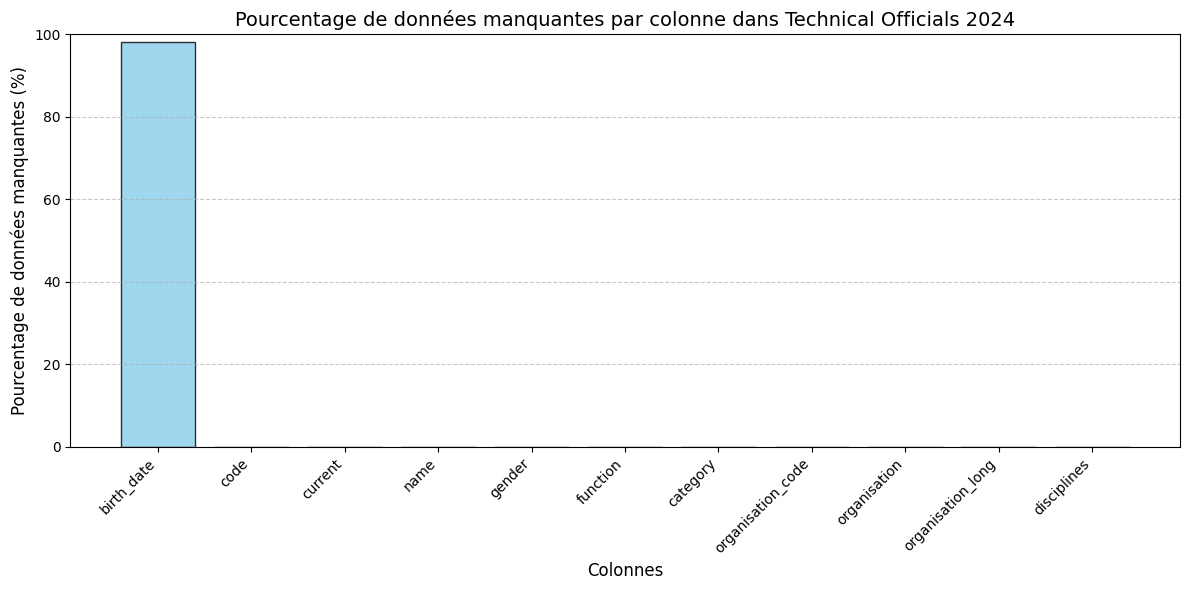

In [ ]:
plot_missing_data_with_0(athletes_df_2024, "Athletes 2024")
plot_missing_data_with_0(coaches_df_2024, "Coaches 2024")
plot_missing_data_without_0(medals_df_2024, "Medals 2024")
plot_missing_data_without_0(medals_total_df_2024, "Medals Total 2024")
plot_missing_data_with_0(technical_officials_df_2024, "Technical Officials 2024")

In [ ]:
# Gestion des valeurs manquantes pour Technical Officials 2024
strategies_technical_officials = {
    "birth_date": "drop_column"  # Supprimer la colonne `birth_date`
}

technical_officials_df_2024 = handle_missing_data(technical_officials_df_2024, strategies_technical_officials)
print("Données manquantes après gestion pour Technical Officials 2024 :")
print(technical_officials_df_2024.isnull().sum())


# Gestion des valeurs manquantes pour Coaches 2024
coaches_df_2024['birth_date'] = pd.to_datetime(coaches_df_2024['birth_date'], errors='coerce')  # Convertir `birth_date` en format date

strategies_coaches = {
    "events": "drop_column",     # Supprimer la colonne `events`
    "birth_date": "median"       # Remplir les valeurs manquantes de `birth_date` avec la médiane
}

coaches_df_2024 = handle_missing_data(coaches_df_2024, strategies_coaches)
print("Données manquantes après gestion pour Coaches 2024 :")
print(coaches_df_2024.isnull().sum())


# Gestion des valeurs manquantes pour Athletes 2024
athletes_df_2024['birth_date'] = pd.to_datetime(athletes_df_2024['birth_date'], errors='coerce')  # Convertir `birth_date` en format date

strategies_athletes = {
    # Colonnes à supprimer entièrement
    "weight": "drop_column",
    "ritual": "drop_column",
    "other_sports": "drop_column",
    "influence": "drop_column",
    "sporting_relatives": "drop_column",
    "philosophy": "drop_column",
    "nickname": "drop_column",
    "hero": "drop_column",
    "hobbies": "drop_column",
    "height": "drop_column",
    "education": "drop_column",
    "family": "drop_column",
    "reason": "drop_column",
    "residence_place": "drop_column",
    "coach": "drop_column",
    "birth_place": "drop_column",
    "occupation": "drop_column",
    "lang": "drop_column",
    # Colonnes où les lignes doivent être supprimées si la valeur est manquante
    "birth_country": "drop_rows",
    "residence_country": "drop_rows"
}

athletes_df_2024 = handle_missing_data(athletes_df_2024, strategies_athletes)
print("Données manquantes après gestion pour Athletes 2024 :")
print(athletes_df_2024.isnull().sum())


# Gestion des valeurs manquantes pour Medals 2024
print("Vérification des données manquantes pour Medals 2024 :")
print(medals_df_2024.isnull().sum())

# Gestion des valeurs manquantes pour Medals Total 2024
print("Vérification des données manquantes pour Medals Total 2024 :")
print(medals_total_df_2024.isnull().sum())


Données manquantes après gestion pour Technical Officials 2024 :
code                 0
current              0
name                 0
gender               0
function             0
category             0
organisation_code    0
organisation         0
organisation_long    0
disciplines          0
dtype: int64
Données manquantes après gestion pour Coaches 2024 :
code            0
current         0
name            0
gender          0
function        0
category        0
country_code    0
country         0
country_long    0
disciplines     0
birth_date      0
dtype: int64
Données manquantes après gestion pour Athletes 2024 :
code                 0
current              0
name                 0
name_short           0
name_tv              0
gender               0
function             0
country_code         0
country              0
country_long         0
nationality          0
nationality_long     0
nationality_code     0
disciplines          0
events               0
birth_date           0
birth_

<ipython-input-11-0e3a92a02815>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


# **Analyse exploratoire**

## Création des fonction pour affichage des cartes


Avant de commencer l'analyse exploratoire on va faire les fonctions pour créer des cartes afin d' observer de manière plus visuelle certaine données dans le monde


On va utiliser la librairie geopandas

Pour que geopandas fonctionne nous avons télécharger les données géographiques des différentes pays sur le site https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

Commençons par charger le fichier

In [ ]:
shapefile_path = '/content/drive/My Drive/Projet_MIDL_3/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

On vérifie si les noms des pays sont les mêmes que ceux de la base de donnée

In [ ]:
print(world['NAME'].unique())

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

On va changer le nom des pays qui ne correspondent pas

In [ ]:
name_mapping = {
    'United States': 'United States of America',
    'Great Britain': 'United Kingdom',
    'Czech Republic': 'Czechia',
    'Dominican Republic': 'Dominican Rep.',
    'ROC': 'Russia',
    'Saint Lucia': 'Trinidad and Tobago',
    "People's Republic of China": 'China',
}


On remplace les noms des pays

In [ ]:
def harmonize_country_names(df):
    df['country'] = df['country'].replace(name_mapping)
    return df



On crée maintenant les cartes souhaitées

In [ ]:
def create_medals_map(medals_df, title):
    medals_df = harmonize_country_names(medals_df.copy())
    medals_by_country = medals_df[medals_df['discipline'] == 'Athletics'].groupby('country').size().reset_index(name='medals')
    merged_data = world.merge(medals_by_country, left_on='NAME', right_on='country', how='left')
    merged_data['medals'] = merged_data['medals'].fillna(0)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))

    merged_data.plot(
        column='medals',
        ax=ax,
        legend=True,
        legend_kwds={'label': f'Nombre de médailles en athlétisme '},
        missing_kwds={'color': 'white'},
        cmap='Reds',
        vmax=30
    )

    merged_data.boundary.plot(ax=ax, linewidth=0.5, color='black')
    ax.axis('off')
    plt.title(title, fontsize=16, pad=20)

    return fig



on crée une deuxième fonction por créer une carte pour quand on va faire des différences de médaille par exemple

In [ ]:
def create_medals_diff_map(medals_df_2020, medals_df_2024, title):
    # Harmoniser les noms des pays
    medals_2020 = medals_df_2020[medals_df_2020['discipline'] == 'Athletics'].groupby('country').size().reset_index(name='medals_2020')
    medals_2024 = medals_df_2024[medals_df_2024['discipline'] == 'Athletics'].groupby('country').size().reset_index(name='medals_2024')

    # Fusionner les données de 2020 et 2024
    medals_compare = pd.merge(medals_2020, medals_2024, on='country', how='outer').fillna(0)
    medals_compare['medals_diff'] = medals_compare['medals_2020'] - medals_compare['medals_2024']
    medals_compare = harmonize_country_names(medals_compare)

    # Fusionner avec les données géographiques
    merged_data = world.merge(medals_compare, left_on='NAME', right_on='country', how='left')
    merged_data['medals_diff'] = merged_data['medals_diff'].fillna(0)

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))

    # Utiliser une palette de couleurs divergente (RdBu)
    merged_data.plot(
        column='medals_diff',
        ax=ax,
        legend=True,
        legend_kwds={'label': 'Différence de médailles (2020-2024)'},
        missing_kwds={'color': 'white'},
        cmap='RdBu',  # Rouge pour positif (baisse), Bleu pour négatif (augmentation)
        vmin=-10,     # Valeur minimale
        vmax=10,      # Valeur maximale
        center=0      # Centre de l'échelle de couleurs
    )

    merged_data.boundary.plot(ax=ax, linewidth=0.5, color='black')
    ax.axis('off')
    plt.title(title, fontsize=16, pad=20)

    return fig

## **Question n°1 : Quels pays sont les plus performants dans certaines disciplines spécifiques, et comment ces performances ont-elles évolué entre 2020 et 2024 ?**

### **Discipline étudiée: Athlétisme**

<ipython-input-21-4cfa4fa4a9e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_2020_athletics['country'] = medals_2020_athletics['country'].replace({
<ipython-input-21-4cfa4fa4a9e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_2024_athletics['country'] = medals_2024_athletics['country'].replace({
<ipython-input-21-4cfa4fa4a9e7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

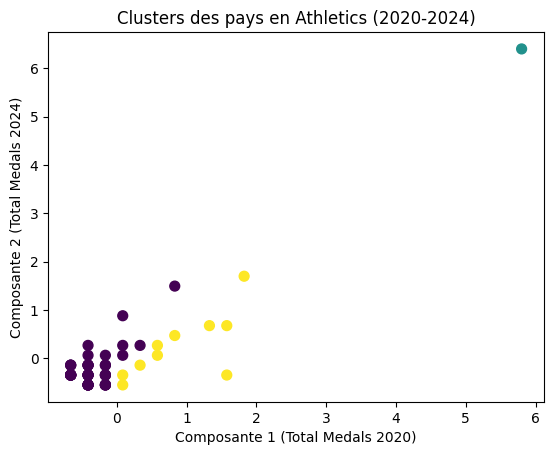


Données finales avec clusters :
                    Total_Medals_2020  Total_Medals_2024  Difference  cluster
country                                                                      
Algeria                           0.0                1.0         1.0        0
Australia                         3.0                7.0         4.0        0
Austria                           1.0                0.0        -1.0        0
Bahamas                           2.0                0.0        -2.0        0
Bahrain                           1.0                2.0         1.0        0
Belarus                           1.0                0.0        -1.0        0
Belgium                           2.0                3.0         1.0        0
Botswana                          1.0                2.0         1.0        0
Brazil                            2.0                2.0         0.0        0
Burkina Faso                      1.0                0.0        -1.0        0
Canada                         

In [ ]:
# 1. Filtrer les données pour la discipline "Athletics"
medals_2020_athletics = medals_df_2020[medals_df_2020['discipline'] == 'Athletics']
medals_2024_athletics = medals_df_2024[medals_df_2024['discipline'] == 'Athletics']

# 2. Harmoniser les noms des pays
medals_2020_athletics['country'] = medals_2020_athletics['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})
medals_2024_athletics['country'] = medals_2024_athletics['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})

# 3. Supprimer les doublons
medals_2020_athletics_cleaned = medals_2020_athletics.drop_duplicates(subset=['country', 'event', 'medal_type'])
medals_2024_athletics_cleaned = medals_2024_athletics.drop_duplicates(subset=['country', 'event', 'medal_type'])

# 4. Ajouter une colonne pour l'année
medals_2020_athletics_cleaned['year'] = 2020
medals_2024_athletics_cleaned['year'] = 2024

# 5. Combiner les données 2020 et 2024
medals_athletics = pd.concat([medals_2020_athletics_cleaned, medals_2024_athletics_cleaned])

# 6. Regrouper par pays et année pour calculer le nombre total de médailles
medals_grouped_athletics = medals_athletics.groupby(['country', 'year']).size().reset_index(name='Total_Medals')

# 7. Pivot pour combiner les totaux de 2020 et 2024
medals_pivot_athletics = medals_grouped_athletics.pivot(index='country', columns='year', values='Total_Medals').fillna(0)
medals_pivot_athletics.columns = ['Total_Medals_2020', 'Total_Medals_2024']

# 8. Calcul de la différence de médailles entre 2024 et 2020
medals_pivot_athletics['Difference'] = medals_pivot_athletics['Total_Medals_2024'] - medals_pivot_athletics['Total_Medals_2020']

# 9. Normalisation des données
scaler = StandardScaler()
medals_scaled = scaler.fit_transform(medals_pivot_athletics[['Total_Medals_2020', 'Total_Medals_2024', 'Difference']])

# 10. Appliquer K-means clustering avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
medals_pivot_athletics['cluster'] = kmeans.fit_predict(medals_scaled)

# 11. Visualisation des clusters
plt.scatter(
    medals_scaled[:, 0], medals_scaled[:, 1],
    c=medals_pivot_athletics['cluster'], cmap='viridis', s=50
)
plt.title("Clusters des pays en Athletics (2020-2024)")
plt.xlabel("Composante 1 (Total Medals 2020)")
plt.ylabel("Composante 2 (Total Medals 2024)")
plt.show()

# 12. Affichage des clusters
print("\nDonnées finales avec clusters :")
print(medals_pivot_athletics)


On crée le dictionnaire avec le nom du pays et le nombre de médaille

In [ ]:
medals_2020_athletics = medals_df_2020[medals_df_2020['discipline'] == 'Athletics']
medals_2024_athletics = medals_df_2024[medals_df_2024['discipline'] == 'Athletics']

medals_2020_dict = medals_2020_athletics.groupby('country').size().to_dict()
medals_2024_dict = medals_2024_athletics.groupby('country').size().to_dict()


Carte représentant le nombre de médaille gagné en 2020

<Figure size 2000x2000 with 0 Axes>

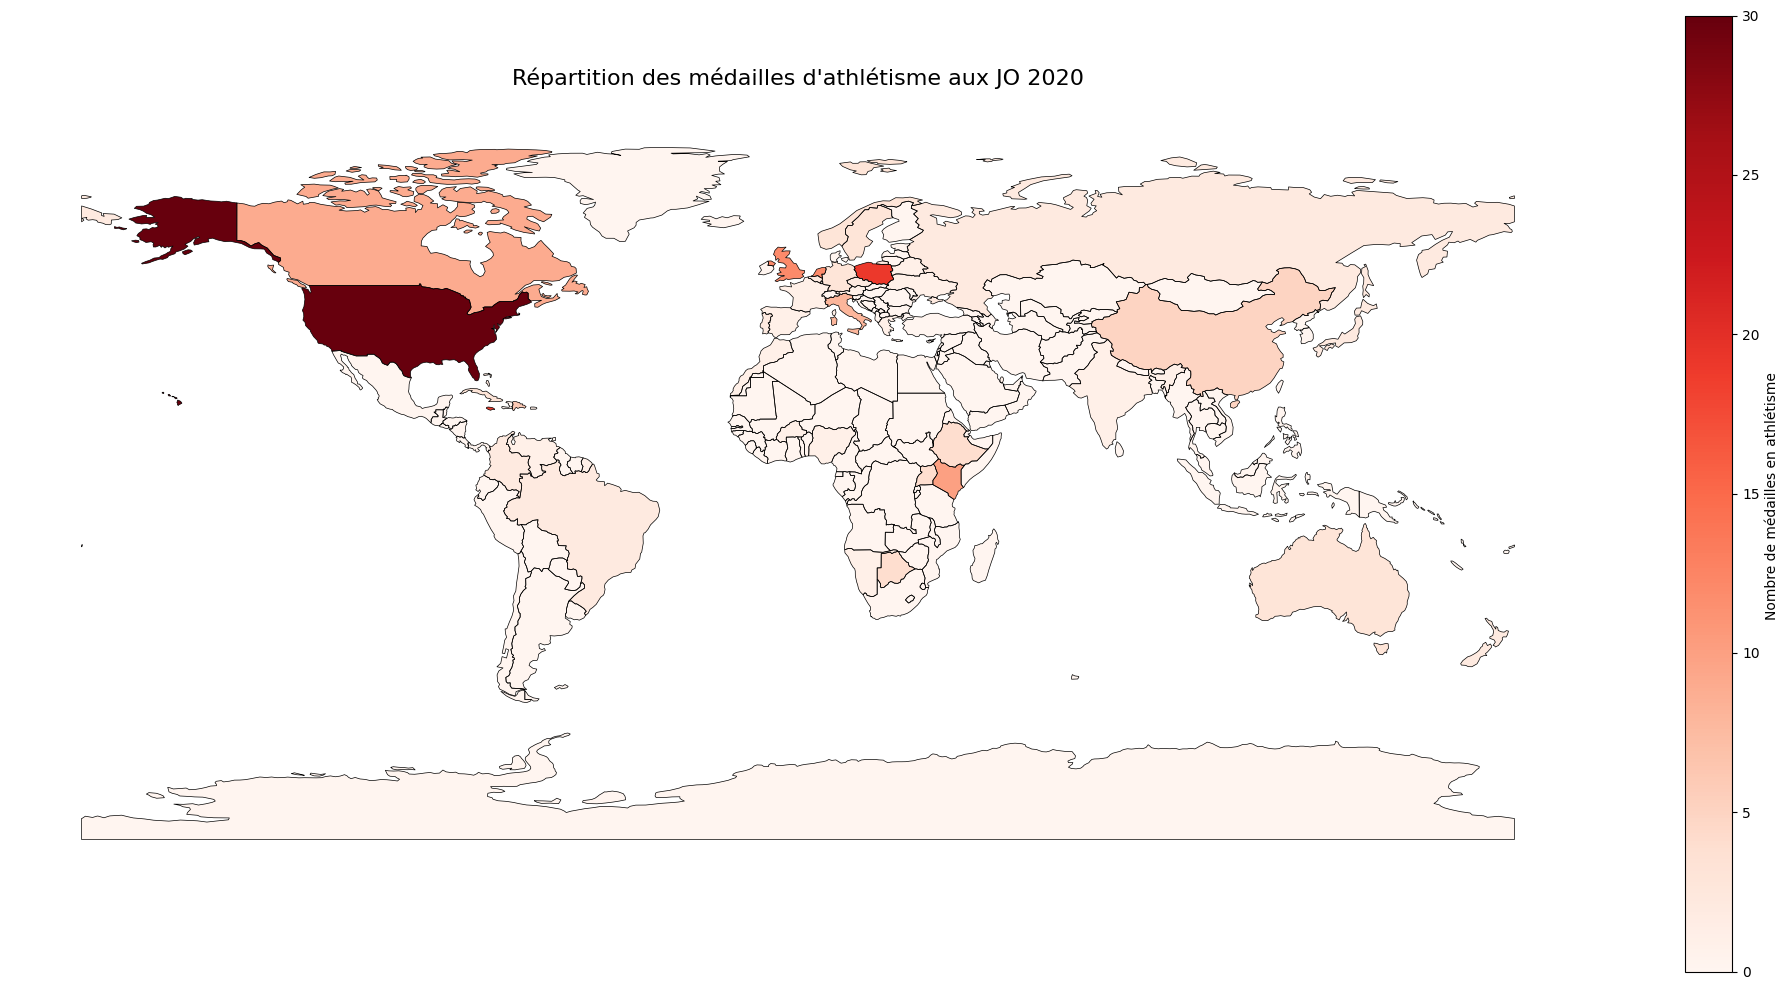

In [ ]:
plt.figure(figsize=(20, 20))
create_medals_map(medals_df_2020, "Répartition des médailles d'athlétisme aux JO 2020")
plt.tight_layout()
plt.show()



Carte représentant le nombre de médaille gagné en 2024

<Figure size 2000x2000 with 0 Axes>

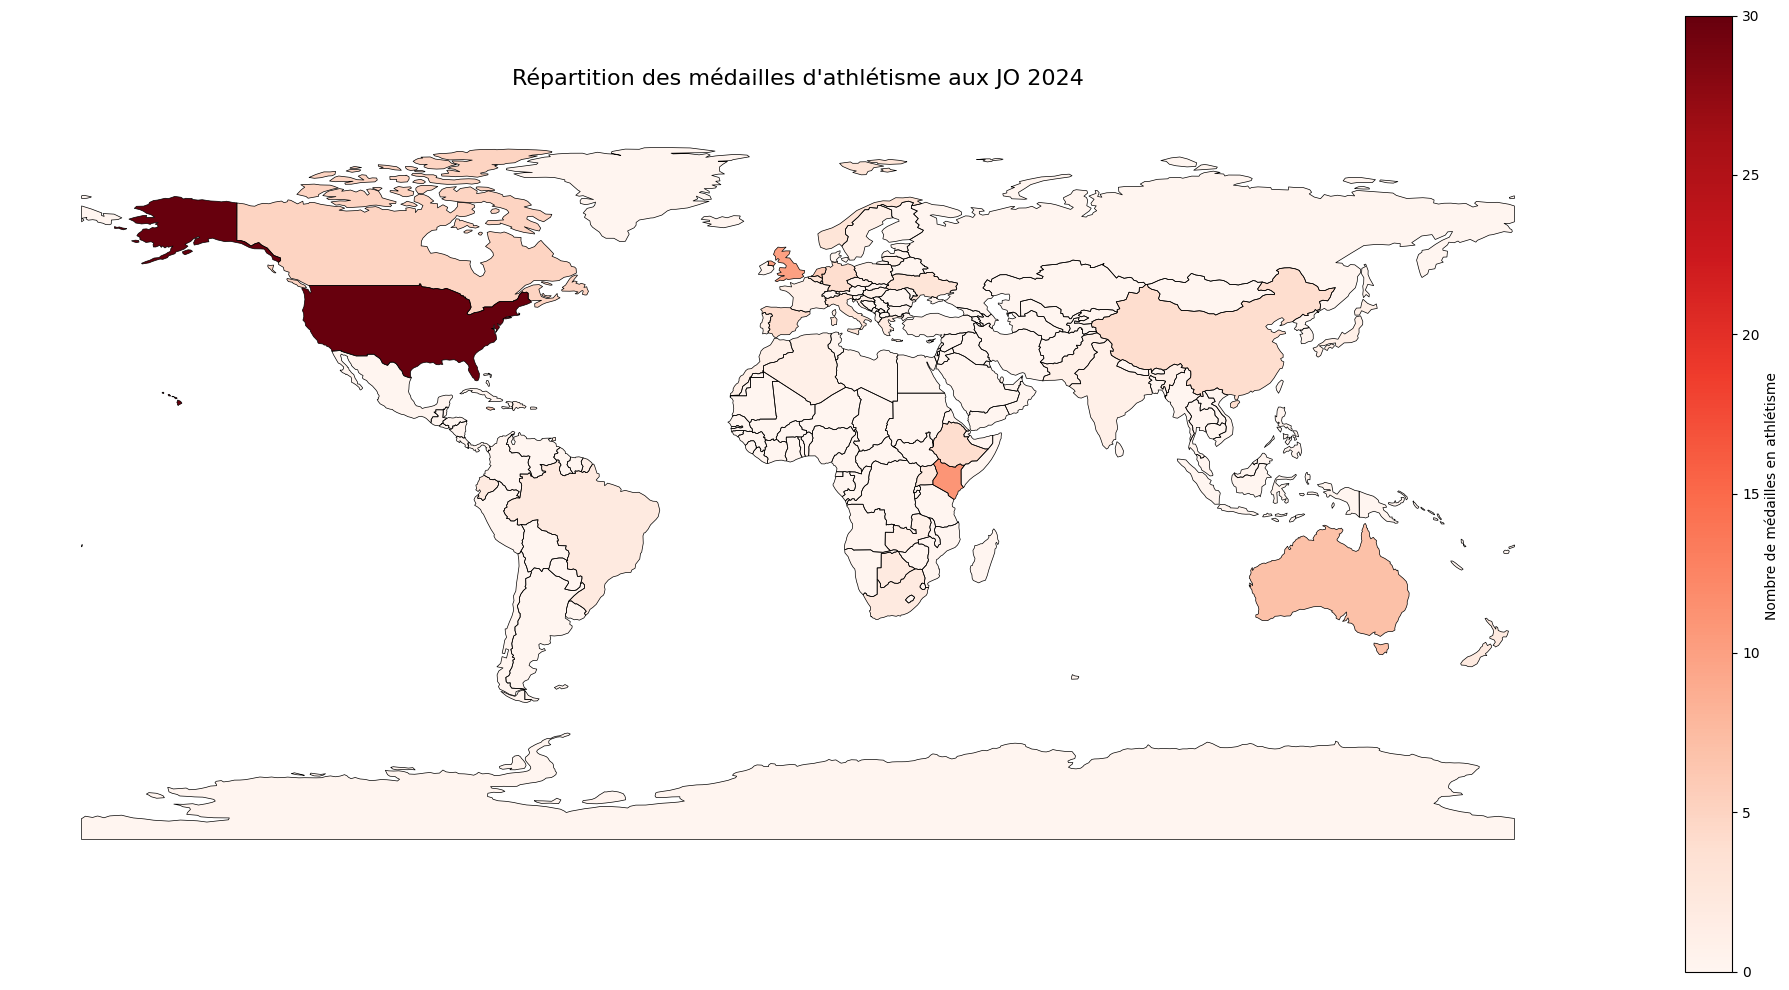

In [ ]:
plt.figure(figsize=(20, 20))
create_medals_map(medals_df_2024, "Répartition des médailles d'athlétisme aux JO 2024")

plt.tight_layout()
plt.show()

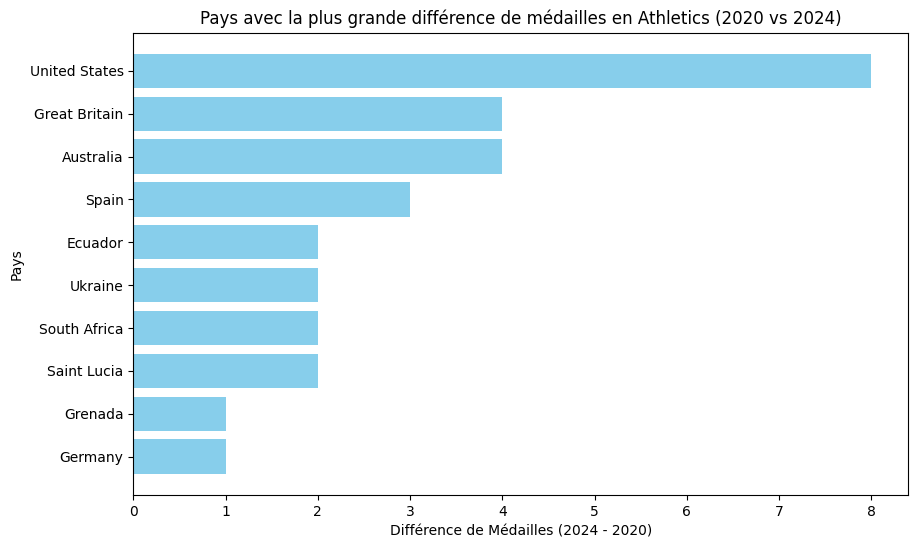

               country  Total_Medals_2020  Total_Medals_2024  Difference
0              Algeria                0.0                1.0         1.0
1            Australia                3.0                7.0         4.0
2              Austria                1.0                0.0        -1.0
3              Bahamas                2.0                0.0        -2.0
4              Bahrain                1.0                2.0         1.0
5              Belarus                1.0                0.0        -1.0
6              Belgium                2.0                3.0         1.0
7             Botswana                1.0                2.0         1.0
8               Brazil                2.0                2.0         0.0
9         Burkina Faso                1.0                0.0        -1.0
10              Canada                6.0                5.0        -1.0
11               China                5.0                4.0        -1.0
12            Colombia                2.0          

In [ ]:
# Regrouper par pays et année pour calculer le nombre total de médailles
medals_2020_athletics_grouped = medals_2020_athletics_cleaned.groupby('country').size().reset_index(name='Total_Medals_2020')
medals_2024_athletics_grouped = medals_2024_athletics_cleaned.groupby('country').size().reset_index(name='Total_Medals_2024')

# Harmoniser les noms des pays
medals_2020_athletics_grouped['country'] = medals_2020_athletics_grouped['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})
medals_2024_athletics_grouped['country'] = medals_2024_athletics_grouped['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})

# Joindre les totaux de médailles 2020 et 2024
medals_diff_athletics = pd.merge(
    medals_2020_athletics_grouped,
    medals_2024_athletics_grouped,
    on='country',
    how='outer'
).fillna(0)  # Remplir les valeurs manquantes par 0 si un pays n'apparaît qu'une année

# Calculer la différence de médailles
medals_diff_athletics['Difference'] = medals_diff_athletics['Total_Medals_2024'] - medals_diff_athletics['Total_Medals_2020']

# Trier par différence décroissante
medals_diff_athletics_sorted = medals_diff_athletics.sort_values(by='Difference', ascending=False)

# Sélectionner les 10 pays avec la plus grande différence
top_countries_diff = medals_diff_athletics_sorted.head(10)

# Créer un graphique des différences
plt.figure(figsize=(10, 6))
plt.barh(top_countries_diff['country'], top_countries_diff['Difference'], color='skyblue')
plt.xlabel('Différence de Médailles (2024 - 2020)')
plt.ylabel('Pays')
plt.title('Pays avec la plus grande différence de médailles en Athletics (2020 vs 2024)')
plt.gca().invert_yaxis()  # Inverser l'ordre des pays pour avoir le plus grand en haut
plt.show()

# Afficher les 20 premières lignes
print(medals_diff_athletics.head(20))


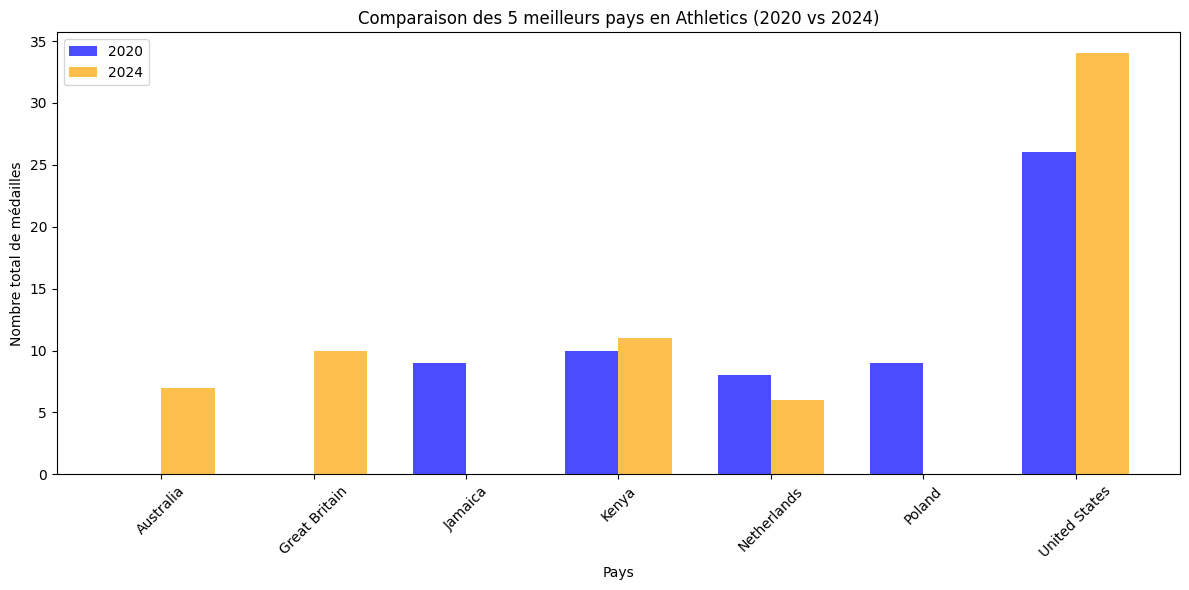

Les pays communs dans le top 5 entre 2020 et 2024 :
{'Netherlands', 'Kenya', 'United States'}


In [ ]:
# Trier pour obtenir les 5 meilleurs pays en 2020 et 2024
top_2020_athletics = medals_2020_athletics_grouped.sort_values(by='Total_Medals_2020', ascending=False).head(5)
top_2024_athletics = medals_2024_athletics_grouped.sort_values(by='Total_Medals_2024', ascending=False).head(5)

# Comparer les 5 premiers pays entre 2020 et 2024
common_countries_athletics = set(top_2020_athletics['country']).intersection(set(top_2024_athletics['country']))

# Fusionner les données pour aligner les pays
top_countries = pd.merge(
    top_2020_athletics,
    top_2024_athletics,
    on='country',
    how='outer'
).fillna(0)

# Indices pour aligner les barres côte à côte
x = np.arange(len(top_countries['country']))

# Taille des barres
width = 0.35

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, top_countries['Total_Medals_2020'], width, label='2020', color='blue', alpha=0.7)
plt.bar(x + width/2, top_countries['Total_Medals_2024'], width, label='2024', color='orange', alpha=0.7)

# Ajout des labels et du titre
plt.xticks(x, top_countries['country'], rotation=45)
plt.xlabel('Pays')
plt.ylabel('Nombre total de médailles')
plt.title('Comparaison des 5 meilleurs pays en Athletics (2020 vs 2024)')
plt.legend()
plt.tight_layout()
plt.show()

# Afficher les pays communs
print("Les pays communs dans le top 5 entre 2020 et 2024 :")
print(common_countries_athletics)


On peut voir que les pays principaux présents dans les 2 tops sont le Kenya et les États-Unis. Ce sont donc les plus performants en athlétisme et on peut voir qu'ils continuent de devenir meilleur au fil des JO.

L'Australie, la grande-Bretagne et la Pologne n'ont qu'une donnée car ces pays sont dans le top 5 des meilleurs performances à l'un ou l'autre des JO mais pas les deux.

### **Discipline étudiée : Natation**

K-means


<ipython-input-27-fa603c1518de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_2020_swimming['country'] = medals_2020_swimming['country'].replace({
<ipython-input-27-fa603c1518de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_2024_swimming['country'] = medals_2024_swimming['country'].replace({
<ipython-input-27-fa603c1518de>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

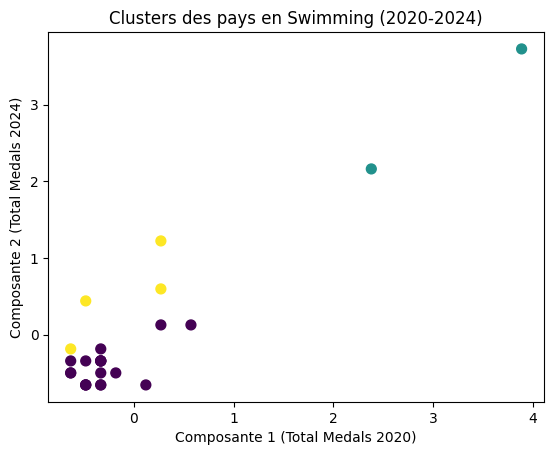


Données finales avec clusters :
                  Total_Medals_2020  Total_Medals_2024  Difference  cluster
country                                                                    
Australia                      20.0               18.0        -2.0        1
Brazil                          2.0                0.0        -2.0        0
Canada                          6.0                8.0         2.0        2
China                           6.0               12.0         6.0        2
Denmark                         1.0                0.0        -1.0        0
Finland                         1.0                0.0        -1.0        0
France                          1.0                7.0         6.0        2
Germany                         2.0                2.0         0.0        0
Great Britain                   8.0                5.0        -3.0        0
Greece                          0.0                1.0         1.0        0
Hong Kong, China                2.0                2.0 

In [ ]:
# 1. Filtrer les données pour la discipline "Swimming"
medals_2020_swimming = medals_df_2020[medals_df_2020['discipline'] == 'Swimming']
medals_2024_swimming = medals_df_2024[medals_df_2024['discipline'] == 'Swimming']

# 2. Harmoniser les noms des pays
medals_2020_swimming['country'] = medals_2020_swimming['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})
medals_2024_swimming['country'] = medals_2024_swimming['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})

# 3. Supprimer les doublons
medals_2020_swimming_cleaned = medals_2020_swimming.drop_duplicates(subset=['country', 'event', 'medal_type'])
medals_2024_swimming_cleaned = medals_2024_swimming.drop_duplicates(subset=['country', 'event', 'medal_type'])

# 4. Ajouter une colonne pour l'année
medals_2020_swimming_cleaned['year'] = 2020
medals_2024_swimming_cleaned['year'] = 2024

# 5. Combiner les données 2020 et 2024
medals_swimming = pd.concat([medals_2020_swimming_cleaned, medals_2024_swimming_cleaned])

# 6. Regrouper par pays et année pour calculer le nombre total de médailles
medals_grouped_swimming = medals_swimming.groupby(['country', 'year']).size().reset_index(name='Total_Medals')

# 7. Pivot pour combiner les totaux de 2020 et 2024
medals_pivot_swimming = medals_grouped_swimming.pivot(index='country', columns='year', values='Total_Medals').fillna(0)
medals_pivot_swimming.columns = ['Total_Medals_2020', 'Total_Medals_2024']

# 8. Calcul de la différence de médailles entre 2024 et 2020
medals_pivot_swimming['Difference'] = medals_pivot_swimming['Total_Medals_2024'] - medals_pivot_swimming['Total_Medals_2020']

# 9. Normalisation des données
scaler = StandardScaler()
medals_scaled = scaler.fit_transform(medals_pivot_swimming[['Total_Medals_2020', 'Total_Medals_2024', 'Difference']])

# 10. Appliquer K-means clustering avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
medals_pivot_swimming['cluster'] = kmeans.fit_predict(medals_scaled)

# 11. Visualisation des clusters
plt.scatter(
    medals_scaled[:, 0], medals_scaled[:, 1],
    c=medals_pivot_swimming['cluster'], cmap='viridis', s=50
)
plt.title("Clusters des pays en Swimming (2020-2024)")
plt.xlabel("Composante 1 (Total Medals 2020)")
plt.ylabel("Composante 2 (Total Medals 2024)")
plt.show()

# 12. Affichage des clusters
print("\nDonnées finales avec clusters :")
print(medals_pivot_swimming)


On peut voir que deux pays sortent en tête: les États-Unis, et l'Australie. Ils ont de données pliutot equilibrées (quasiment le meme nombre en 2020 et 2024 mais analysons plus en détail avec le graphique suivant)

Différence de médaille entre 2020 et 2024 par pays

<ipython-input-28-b10c86033c0d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_2020_swimming['country'] = medals_2020_swimming['country'].replace({
<ipython-input-28-b10c86033c0d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_2024_swimming['country'] = medals_2024_swimming['country'].replace({


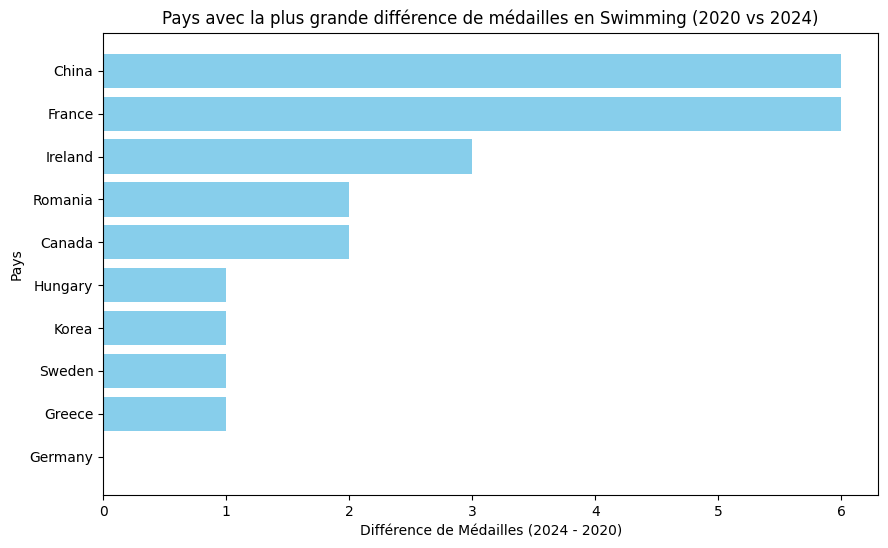

             country  Total_Medals_2020  Total_Medals_2024  Difference
0          Australia               20.0               18.0        -2.0
1             Brazil                2.0                0.0        -2.0
2             Canada                6.0                8.0         2.0
3              China                6.0               12.0         6.0
4            Denmark                1.0                0.0        -1.0
5            Finland                1.0                0.0        -1.0
6             France                1.0                7.0         6.0
7            Germany                2.0                2.0         0.0
8      Great Britain                8.0                5.0        -3.0
9             Greece                0.0                1.0         1.0
10  Hong Kong, China                2.0                2.0         0.0
11           Hungary                2.0                3.0         1.0
12           Ireland                0.0                3.0         3.0
13    

In [ ]:
# Regrouper par pays et année pour calculer le nombre total de médailles
medals_2020_swimming_grouped = medals_2020_swimming_cleaned.groupby('country').size().reset_index(name='Total_Medals_2020')
medals_2024_swimming_grouped = medals_2024_swimming_cleaned.groupby('country').size().reset_index(name='Total_Medals_2024')

# Harmoniser les noms des pays
medals_2020_swimming_grouped['country'] = medals_2020_swimming_grouped['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})
medals_2024_swimming_grouped['country'] = medals_2024_swimming_grouped['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})

medals_2020_swimming['country'] = medals_2020_swimming['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})
medals_2024_swimming['country'] = medals_2024_swimming['country'].replace({
    'United States of America': 'United States',
    "People's Republic of China": 'China'
})
# Joindre les totaux de médailles 2020 et 2024
medals_diff_swimming = pd.merge(
    medals_2020_swimming_grouped,
    medals_2024_swimming_grouped,
    on='country',
    how='outer'
).fillna(0)  # Remplir les valeurs manquantes par 0 si un pays n'apparaît qu'une année

# Calculer la différence de médailles
medals_diff_swimming['Difference'] = medals_diff_swimming['Total_Medals_2024'] - medals_diff_swimming['Total_Medals_2020']

# Trier par différence décroissante
medals_diff_swimming_sorted = medals_diff_swimming.sort_values(by='Difference', ascending=False)

# Sélectionner les 10 pays avec la plus grande différence
top_countries_diff = medals_diff_swimming_sorted.head(10)

# Créer un graphique des différences
plt.figure(figsize=(10, 6))
plt.barh(top_countries_diff['country'], top_countries_diff['Difference'], color='skyblue')
plt.xlabel('Différence de Médailles (2024 - 2020)')
plt.ylabel('Pays')
plt.title('Pays avec la plus grande différence de médailles en Swimming (2020 vs 2024)')
plt.gca().invert_yaxis()  # Inverser l'ordre des pays pour avoir le plus grand en haut
plt.show()

# Afficher les 20 premières lignes
print(medals_diff_swimming.head(40))


Graphique des totaux par pays (2020 vs 2024)

In [ ]:

# Trier pour obtenir les 5 meilleurs pays en 2020 et 2024
top_2020_swimming = medals_2020_swimming_grouped.sort_values(by='Total_Medals_2020', ascending=False).head(5)
top_2024_swimming = medals_2024_swimming_grouped.sort_values(by='Total_Medals_2024', ascending=False).head(5)

# Comparer les 5 premiers pays entre 2020 et 2024
common_countries_swimming = set(top_2020_swimming['country']).intersection(set(top_2024_swimming['country']))

# Fusionner les données pour aligner les pays
top_countries = pd.merge(
    top_2020_swimming,
    top_2024_swimming,
    on='country',
    how='outer'
).fillna(0)

# Indices pour aligner les barres côte à côte
x = np.arange(len(top_countries['country']))

# Taille des barres
width = 0.35

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, top_countries['Total_Medals_2020'], width, label='2020', color='blue', alpha=0.7)
plt.bar(x + width/2, top_countries['Total_Medals_2024'], width, label='2024', color='orange', alpha=0.7)

# Ajout des labels et du titre
plt.xticks(x, top_countries['country'], rotation=45)
plt.xlabel('Pays')
plt.ylabel('Nombre total de médailles')
plt.title('Comparaison des 5 meilleurs pays en Swimming (2020 vs 2024)')
plt.legend()
plt.tight_layout()
plt.show()

# Afficher les pays communs
print("Les pays communs dans le top 5 entre 2020 et 2024 :")
print(common_countries_swimming)


Les pays communs dans le top 5 entre 2020 et 2024 :
{'Australia', 'Canada', 'United States', 'China'}


On peut voir que les pays les plus performants sont les États-Unis et l'Australie. Le Canada et la Chine sont également dans le top chaque année ce qui dénote une certaine régularité de performance. En revanche, contrairement à l'athlétisme, on remarque une baisse légère du nombre de médaille pour les pays les plus performants au fil des JO.

## **Question n°2 : Quels sont les profils typiques des athlètes qui gagnent des médailles (par exemple, âge moyen, taille, expérience) ?**

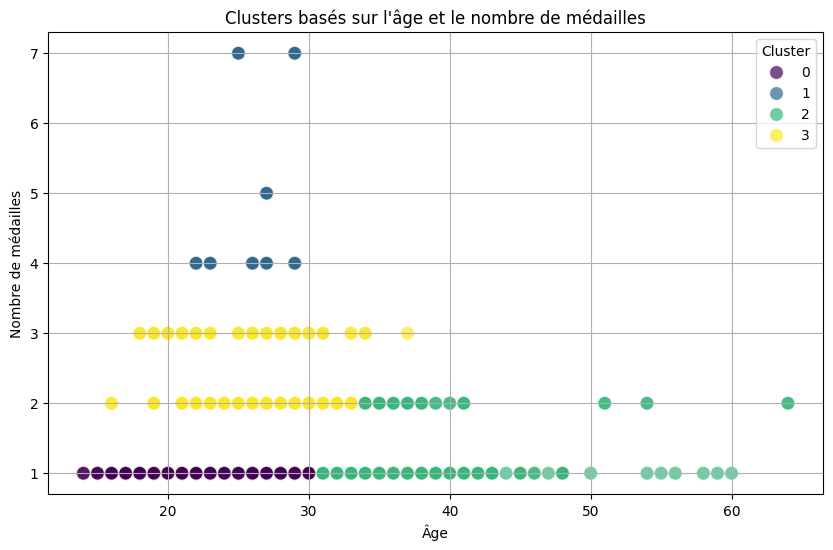

               age  medal_count
cluster                        
0        26.330414     1.000000
1        26.137255     4.921569
2        34.833133     1.074430
3        26.672000     2.296000


In [39]:
# Fusionner les données des athlètes avec les médailles
merged_2020 = athletes_df_2020.merge(medals_df_2020, left_on='name', right_on='athlete_name', how='inner')
merged_2024 = athletes_df_2024.merge(medals_df_2024, left_on='name', right_on='name', how='inner')

# Ajouter une colonne pour différencier les années
merged_2020['year'] = 2020
merged_2024['year'] = 2024

# Concaténer les données des deux années
merged_combined = pd.concat([merged_2020, merged_2024], ignore_index=True)

# Calculer l'âge à partir de la date de naissance
merged_combined['age'] = pd.to_datetime('2024-01-01') - pd.to_datetime(merged_combined['birth_date'])
merged_combined['age'] = merged_combined['age'].dt.days // 365  # Convertir les jours en années

# Ajouter une colonne pour compter le nombre de médailles par athlète
merged_combined['medal_count'] = merged_combined.groupby('name')['medal_type'].transform('count')

# Filtrer les données pour le clustering (âge et nombre de médailles)
columns_for_clustering = ['age', 'medal_count']
clustering_data = merged_combined[columns_for_clustering].dropna()

# Normalisation des données quantitatives
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Méthode Elbow pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Visualisation de la méthode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS')
plt.show()

# Appliquer K-means avec le nombre optimal de clusters (exemple k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_combined['cluster'] = kmeans.fit_predict(scaled_data)

# Visualisation des clusters (âge et nombre de médailles)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_combined['age'], y=merged_combined['medal_count'],
    hue=merged_combined['cluster'], palette='viridis', s=100, alpha=0.7
)
plt.title('Clusters basés sur l\'âge et le nombre de médailles')
plt.xlabel('Âge')
plt.ylabel('Nombre de médailles')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Résumé des clusters
cluster_stats = merged_combined.groupby('cluster')[['age', 'medal_count']].mean()
print(cluster_stats)


On peut voir que les athlètes âgés de 23 à 28 ans gagnent plus de médailles que les autres. Et que plus on vieillit, moins on gagne de médailles.

On va maintenant regarder si le fait de participer en 2020 aide à obtenir des médailles en 2024

<ipython-input-31-648ac8b8a43c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  athletes_with_medals_2024['medal_count_2024'].fillna(0, inplace=True)  # Remplacer NaN par 0 (aucune médaille)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct cl

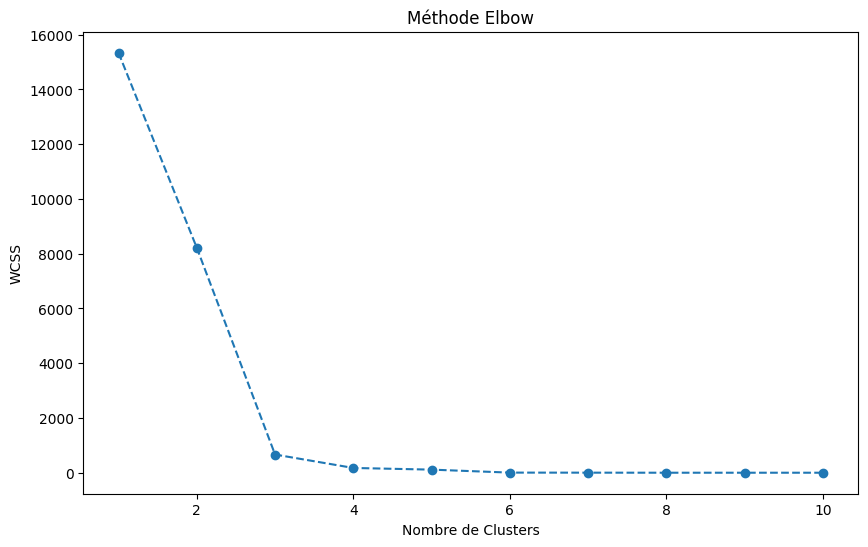

         participated_2020  medal_count_2024
cluster                                     
0                 0.413793          1.051724
1                 0.000000          0.000000
2                 1.000000          0.000000


In [ ]:
# Identifier les participants 2020 et 2024
participants_2020 = set(athletes_df_2020['name'])
participants_2024 = set(athletes_df_2024['name'])

# Ajouter une colonne pour différencier les groupes (Participé en 2020 ou Non)
athletes_df_2024['participated_2020'] = athletes_df_2024['name'].apply(lambda x: 1 if x in participants_2020 else 0)

# Calculer le nombre de médailles en 2024 pour chaque athlète
medals_count_2024 = medals_df_2024.groupby('name')['medal_type'].count().reset_index()
medals_count_2024.rename(columns={'medal_type': 'medal_count_2024'}, inplace=True)

# Fusionner les informations de médailles avec les données des athlètes 2024
athletes_with_medals_2024 = athletes_df_2024.merge(medals_count_2024, on='name', how='left')
athletes_with_medals_2024['medal_count_2024'].fillna(0, inplace=True)  # Remplacer NaN par 0 (aucune médaille)

# Préparation des données pour le clustering (participation et médailles)
columns_for_clustering = ['participated_2020', 'medal_count_2024']
clustering_data = athletes_with_medals_2024[columns_for_clustering]

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Méthode Elbow pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Visualisation de la méthode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS')
plt.show()

# Appliquer K-means avec le nombre optimal de clusters (exemple k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
athletes_with_medals_2024['cluster'] = kmeans.fit_predict(scaled_data)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=athletes_with_medals_2024['participated_2020'],
    y=athletes_with_medals_2024['medal_count_2024'],
    hue=athletes_with_medals_2024['cluster'],
    palette='viridis', s=100, alpha=0.7
)
plt.title('Clusters des athlètes 2024 : Participation 2020 vs Nombre de médailles')
plt.xlabel('Participation en 2020 (1 = Oui, 0 = Non)')
plt.ylabel('Nombre de médailles en 2024')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Résumé des clusters
cluster_stats = athletes_with_medals_2024.groupby('cluster')[['participated_2020', 'medal_count_2024']].mean()
print(cluster_stats)


On peut en conclure qu'il n'y a pas de lien entre participer plusieurs fois et gagner des médailles.

## **Question n°3 : Quels nouveaux pays ou disciplines ont gagné des médailles pour la première fois en 2024 ?**

In [ ]:
# Colonnes pertinentes pour l'analyse
columns_to_keep = ['country', 'discipline']

# Filtrage des colonnes pertinentes pour 2020 et 2024
medals_2020_filtered = medals_df_2020[columns_to_keep].drop_duplicates()
medals_2024_filtered = medals_df_2024[columns_to_keep].drop_duplicates()

# Identification des nouveaux pays ou disciplines en 2024
new_entries = medals_2024_filtered.merge(medals_2020_filtered, on=['country', 'discipline'], how='left', indicator=True)
new_entries = new_entries[new_entries['_merge'] == 'left_only'].drop(columns=['_merge'])

# Affichage des résultats
print("Nouveaux pays ou disciplines ayant gagné des médailles en 2024 :")
print(new_entries)


Nouveaux pays ou disciplines ayant gagné des médailles en 2024 :
           country           discipline
3    Great Britain         Cycling Road
4    United States         Cycling Road
5            China               Diving
6    United States               Diving
8            Korea              Fencing
..             ...                  ...
482    Puerto Rico            Wrestling
483        Bahrain            Wrestling
484       Colombia            Wrestling
485          China  Rhythmic Gymnastics
488        Germany  Rhythmic Gymnastics

[245 rows x 2 columns]


On peut voir toutes les disciplines ou un nouveau pays a gagné des médailles par rapport à 2020.

In [ ]:
# Comptage des occurrences de chaque pays dans le tableau new_entries
country_counts = new_entries['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Occurrences']

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(country_counts['Country'], country_counts['Occurrences'], color='skyblue')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.title('Occurrences of Countries in New Disciplines (2024)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


On peut voir que les pays ayant gagnés le plus de médaille dans de nouvelles discipline par rapoprt a 2020 sont les États-Unis et la Chine.



## **Question n°4 :  Quels sont les sports où certains pays ou continents dominent largement, et comment cette domination a-t-elle évolué entre 2020 et 2024 ?**

Pays dominants dans chaque discipline avec proportion > 25% :
                discipline        country  Total Medals  Proportion
2           3x3 Basketball            ROC             8    0.333333
9                  Archery          Korea             9    0.300000
31       Artistic Swimming          China            10    0.333333
32       Artistic Swimming            ROC            10    0.333333
33       Artistic Swimming        Ukraine            10    0.333333
77               Badminton          China            10    0.416667
87       Baseball/Softball          Japan            39    0.333333
88       Baseball/Softball  United States            39    0.333333
90              Basketball         France            24    0.333333
92              Basketball  United States            24    0.333333
126           Canoe Slalom        Germany             4    0.333333
152  Cycling BMX Freestyle  Great Britain             2    0.333333
156     Cycling BMX Racing       Colombia             

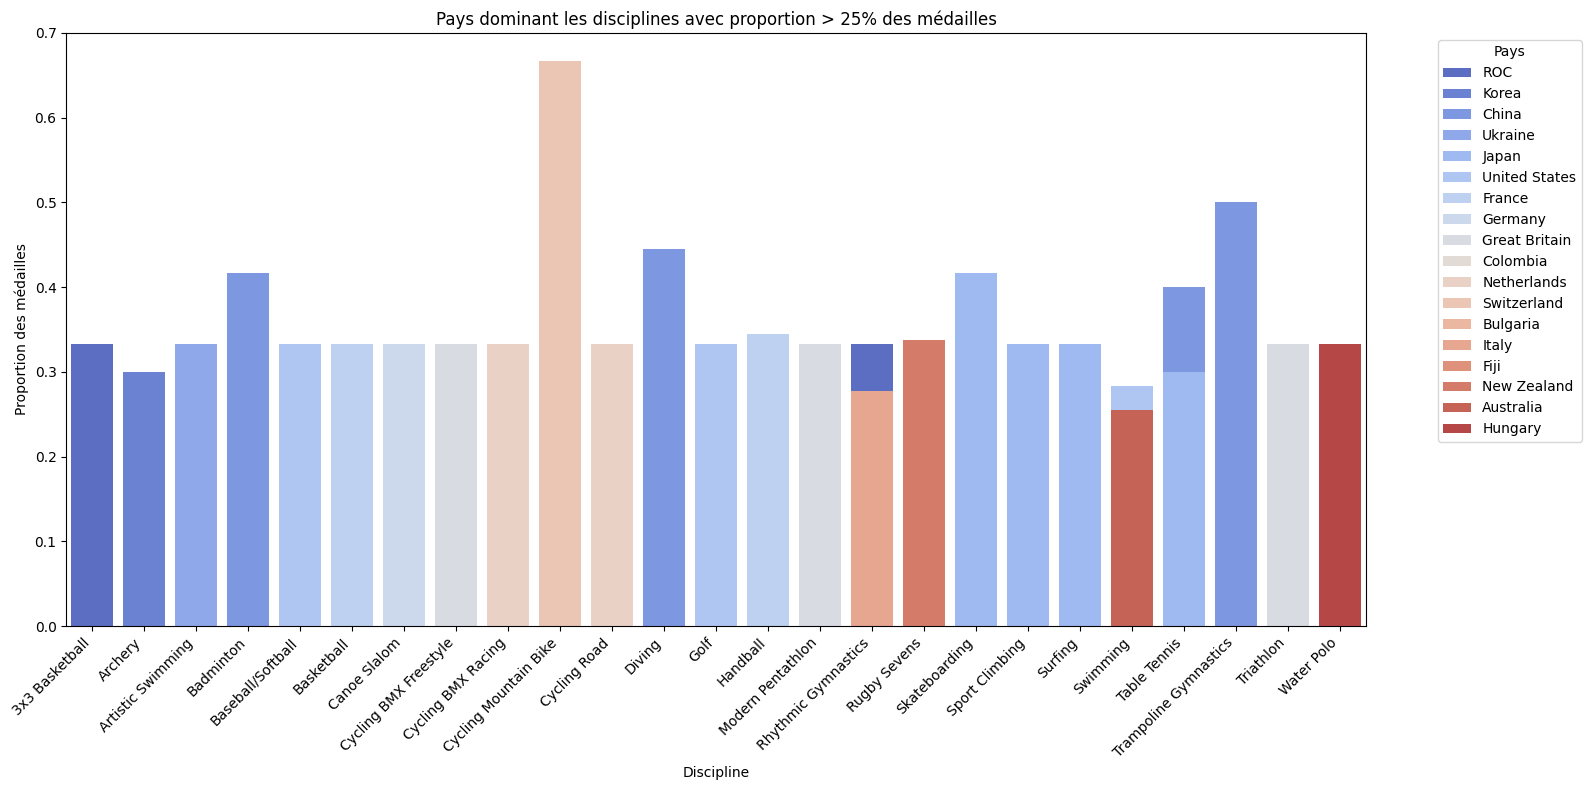

In [40]:
# Agrégation des médailles par pays et discipline
medals_by_country_discipline = medals_df_2020.groupby(['discipline', 'country'])['medal_type'].count().reset_index()
medals_by_country_discipline.rename(columns={'medal_type': 'Total Medals'}, inplace=True)

# Calcul des proportions par discipline
def find_dominant_countries(data, threshold=0.25):
    dominant_countries = []
    for discipline in data['discipline'].unique():
        subset = data[data['discipline'] == discipline].copy()
        total_medals_discipline = subset['Total Medals'].sum()
        subset['Proportion'] = subset['Total Medals'] / total_medals_discipline
        dominant = subset[subset['Proportion'] > threshold]
        dominant_countries.append(dominant)
    return pd.concat(dominant_countries)

# Remplacement des noms de pays
def standardize_country_names(df):
    df['country'] = df['country'].replace({
        'United States of America': 'United States',
        "People's Republic of China": 'China',
        'Republic of Korea': 'Korea'
    })
    return df

medals_df_2020 = standardize_country_names(medals_df_2020)
medals_df_2024 = standardize_country_names(medals_df_2024)


# Filtrer les pays dominants avec une proportion > 25%
dominant_countries = find_dominant_countries(medals_by_country_discipline, threshold=0.25)

# Afficher les résultats
print("Pays dominants dans chaque discipline avec proportion > 25% :")
print(dominant_countries)

# Visualiser les résultats avec des barres plus larges
plt.figure(figsize=(16, 8))
sns.barplot(
    data=dominant_countries,
    x='discipline',
    y='Proportion',
    hue='country',
    dodge=False,
    palette="coolwarm"
)
plt.title("Pays dominant les disciplines avec proportion > 25% des médailles")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Proportion des médailles")
plt.xlabel("Discipline")
plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Ce graphique représente les pays ayant gagnés 25% ou plus des médailes d'un sport en 2020.

Pays dominants dans chaque discipline en 2024 avec proportion > 25% :
                discipline        country  Total Medals  Proportion
9                  Archery          Korea             7    0.466667
30       Artistic Swimming          China             2    0.333333
78               Badminton          China             5    0.333333
87              Basketball         France             2    0.333333
89              Basketball  United States             2    0.333333
166     Cycling BMX Racing         France             3    0.500000
169  Cycling Mountain Bike         France             2    0.333333
175           Cycling Road        Belgium             4    0.333333
195                 Diving          China            11    0.458333
204             Equestrian        Germany             5    0.277778
205             Equestrian  Great Britain             5    0.277778
235               Handball        Denmark             2    0.333333
244                 Hockey    Netherlands     

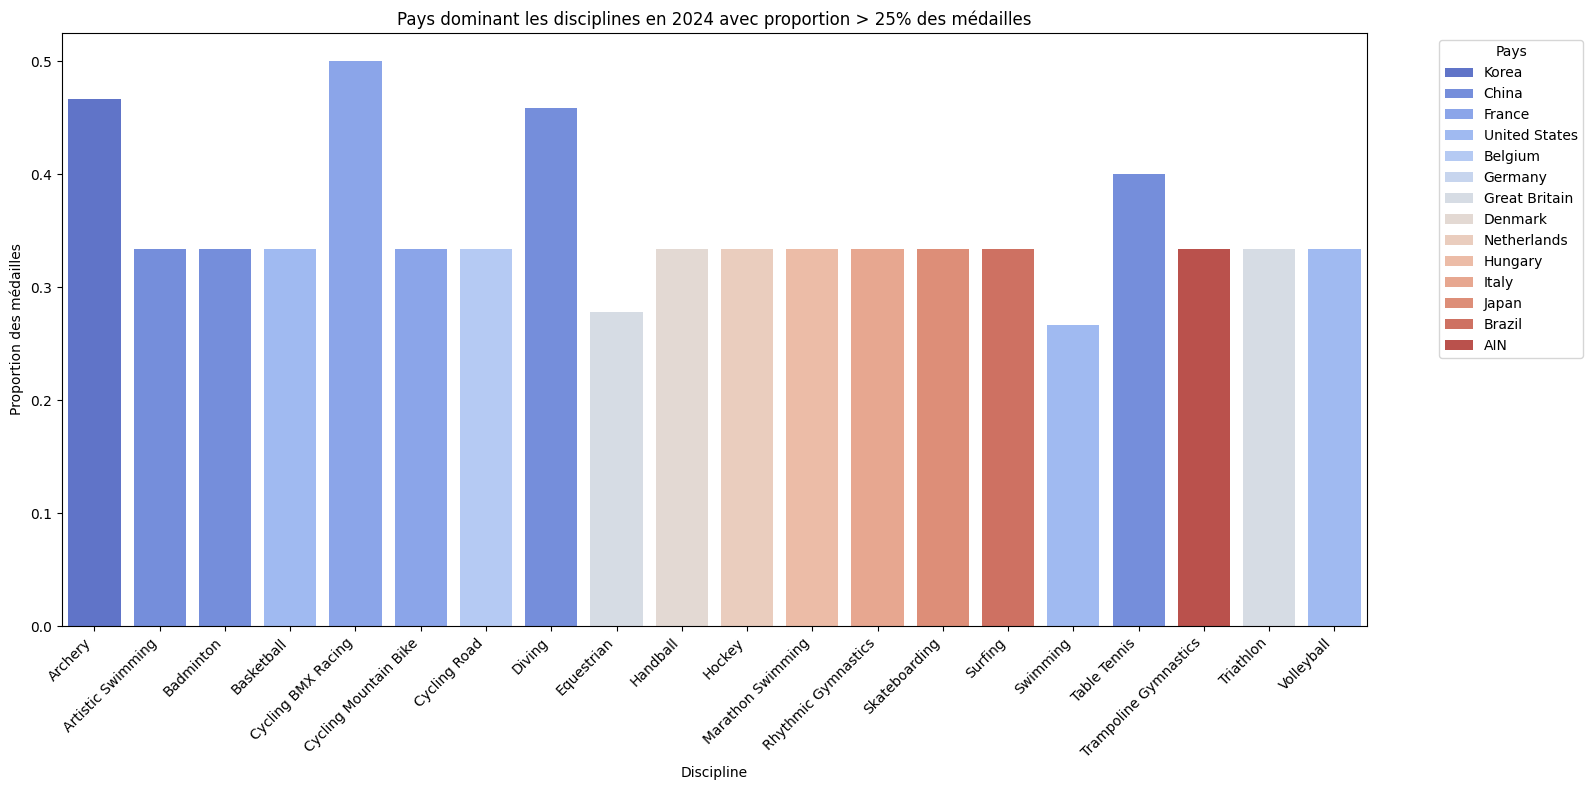

In [41]:
# Agrégation des médailles par pays et discipline
medals_by_country_discipline_2024 = medals_df_2024.groupby(['discipline', 'country'])['medal_type'].count().reset_index()
medals_by_country_discipline_2024.rename(columns={'medal_type': 'Total Medals'}, inplace=True)


# Filtrer les pays dominants avec une proportion > 25% pour 2024
dominant_countries_2024 = find_dominant_countries(medals_by_country_discipline_2024, threshold=0.25)

# Afficher les résultats
print("Pays dominants dans chaque discipline en 2024 avec proportion > 25% :")
print(dominant_countries_2024)

# Visualiser les résultats avec des barres plus larges pour 2024
plt.figure(figsize=(16, 8))  # Augmenter la taille du graphique
sns.barplot(
    data=dominant_countries_2024,
    x='discipline',
    y='Proportion',
    hue='country',
    dodge=False,
    palette="coolwarm"
)
plt.title("Pays dominant les disciplines en 2024 avec proportion > 25% des médailles")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Proportion des médailles")
plt.xlabel("Discipline")
plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Ce graphique représente les pays ayant gagnés 25% ou plus des médailes en 2024.

Pays dominants dans les mêmes disciplines en 2020 et 2024 :
               discipline        country  Proportion_2020  Proportion_2024
0                 Archery          Korea         0.300000         0.466667
1       Artistic Swimming          China         0.333333         0.333333
2               Badminton          China         0.416667         0.333333
3              Basketball         France         0.333333         0.333333
4              Basketball  United States         0.333333         0.333333
5                  Diving          China         0.444444         0.458333
6     Rhythmic Gymnastics          Italy         0.277778         0.333333
7           Skateboarding          Japan         0.416667         0.333333
8                Swimming  United States         0.283654         0.266667
9            Table Tennis          China         0.400000         0.400000
10  Trampoline Gymnastics          China         0.500000         0.333333
11              Triathlon  Great Britain

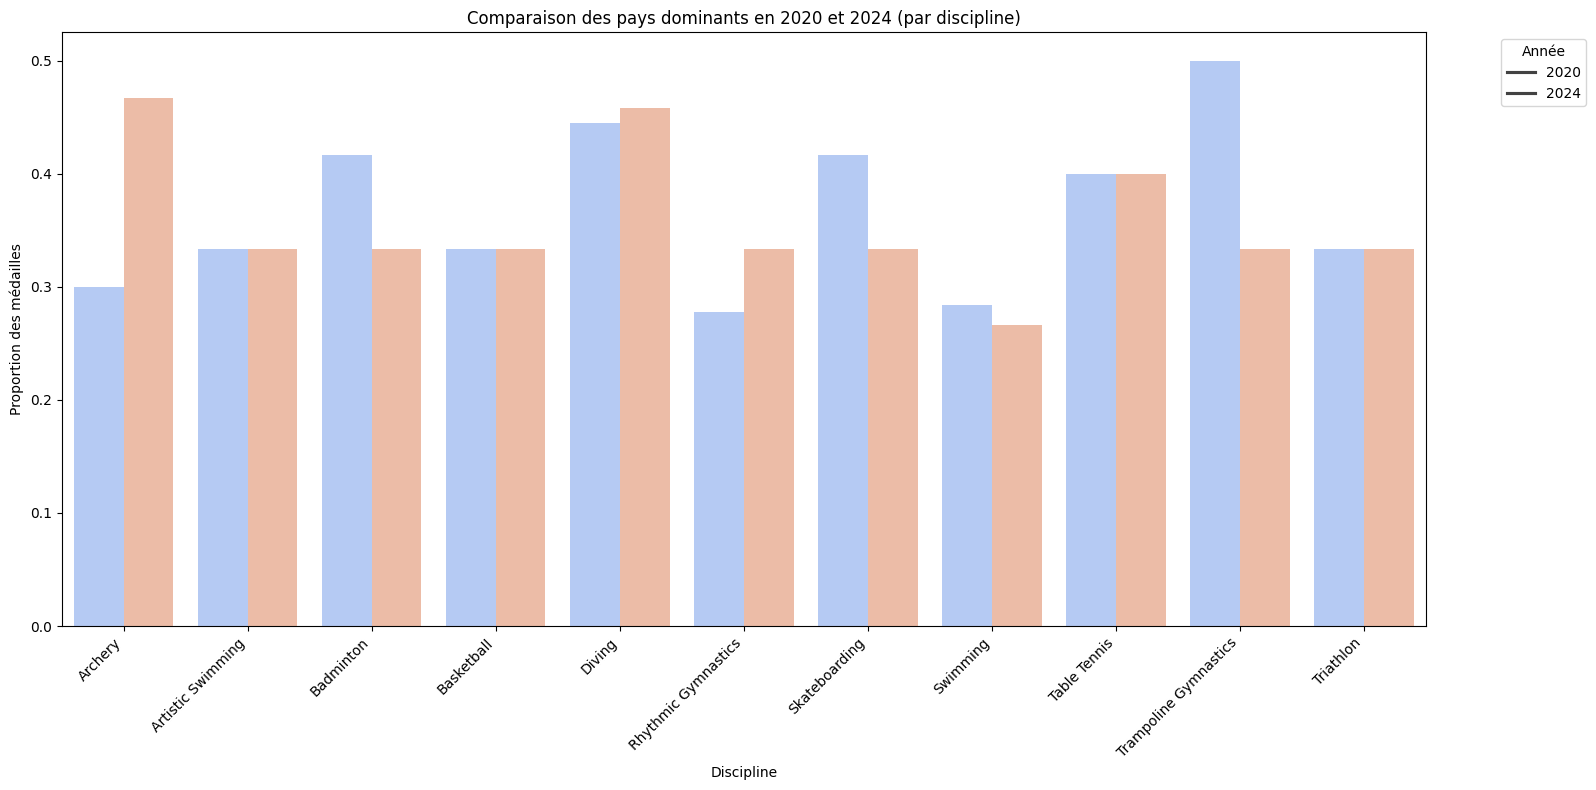

In [42]:
# Agrégation des médailles
def prepare_medals_data(medals_df):
    medals_by_country_discipline = medals_df.groupby(['discipline', 'country'])['medal_type'].count().reset_index()
    medals_by_country_discipline.rename(columns={'medal_type': 'Total Medals'}, inplace=True)
    return medals_by_country_discipline

medals_2020 = prepare_medals_data(medals_df_2020)
medals_2024 = prepare_medals_data(medals_df_2024)

# Identifier les pays dominants pour 2020 et 2024
dominant_2020 = find_dominant_countries(medals_2020, threshold=0.25)
dominant_2024 = find_dominant_countries(medals_2024, threshold=0.25)

# Comparer les pays dominants entre 2020 et 2024
comparison = pd.merge(
    dominant_2020[['discipline', 'country', 'Proportion']],
    dominant_2024[['discipline', 'country', 'Proportion']],
    on=['discipline', 'country'],
    suffixes=('_2020', '_2024')
)

# Afficher les résultats
print("Pays dominants dans les mêmes disciplines en 2020 et 2024 :")
print(comparison)

# Visualiser les résultats côte à côte
plt.figure(figsize=(16, 8))
comparison_melted = comparison.melt(
    id_vars=['discipline', 'country'],
    value_vars=['Proportion_2020', 'Proportion_2024'],
    var_name='Year',
    value_name='Proportion'
)
sns.barplot(
    data=comparison_melted,
    x='discipline',
    y='Proportion',
    hue='Year',
    dodge=True,
    palette="coolwarm"
)
plt.title("Comparaison des pays dominants en 2020 et 2024 (par discipline)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Proportion des médailles")
plt.xlabel("Discipline")
plt.legend(title="Année", labels=['2020', '2024'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Voici les pays dominants chaque sports et surtout leur évolution. Le tir à l'arc a vu la Corée du Sud devenir encore meilleure tandis que le skate boarding a vu la chine perdre en niveau.

## **Question n°5 : Comment la moyenne d'âge des médaillés a-t-elle évolué entre 2020 et 2024 ?**

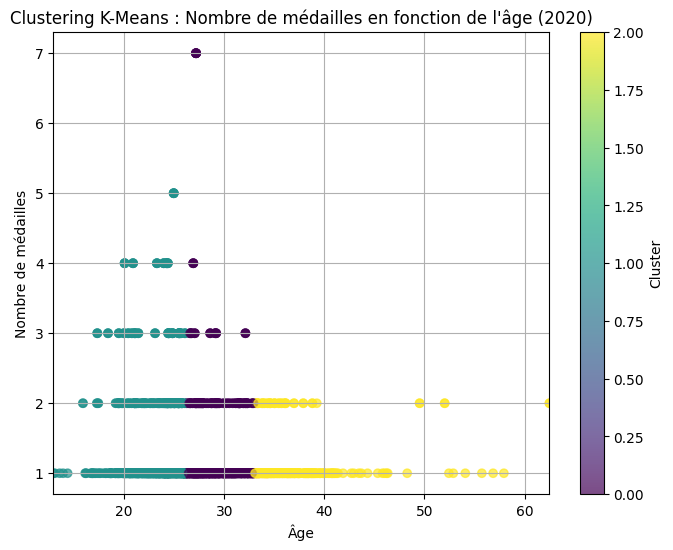

In [ ]:
# Préparer les données pour 2020
merged_2020 = pd.merge(medals_df_2020, athletes_df_2020, left_on='athlete_name', right_on='name', how='inner')
merged_2020['birth_date'] = pd.to_datetime(merged_2020['birth_date'])
merged_2020['medal_date'] = pd.to_datetime(merged_2020['medal_date'])
merged_2020['age'] = (merged_2020['medal_date'] - merged_2020['birth_date']).dt.days / 365.25

# Préparer les données pour 2024
merged_2024 = pd.merge(medals_df_2024, athletes_df_2024, left_on='name', right_on='name', how='inner')
merged_2024['birth_date'] = pd.to_datetime(merged_2024['birth_date'])
merged_2024['medal_date'] = pd.to_datetime(merged_2024['medal_date'])
merged_2024['age'] = (merged_2024['medal_date'] - merged_2024['birth_date']).dt.days / 365.25

# Ajouter le nombre de médailles par athlète
medal_count_2020 = merged_2020.groupby('athlete_name').size().reset_index(name='medal_count')
medal_count_2024 = merged_2024.groupby('name').size().reset_index(name='medal_count')

# Joindre le nombre de médailles
merged_2020 = pd.merge(merged_2020, medal_count_2020, on='athlete_name', how='left')
merged_2024 = pd.merge(merged_2024, medal_count_2024, on='name', how='left')

# Trouver les limites pour l'âge
all_ages = pd.concat([merged_2020['age'], merged_2024['age']])
age_min, age_max = all_ages.min(), all_ages.max()

# Appliquer K-Means et visualiser
for year, data in {'2020': merged_2020, '2024': merged_2024}.items():
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['cluster'] = kmeans.fit_predict(data[['age', 'medal_count']])

    # Visualisation
    plt.figure(figsize=(8, 6))
    plt.scatter(data['age'], data['medal_count'], c=data['cluster'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Cluster')
    plt.title(f"Clustering K-Means : Nombre de médailles en fonction de l'âge ({year})")
    plt.xlabel("Âge")
    plt.ylabel("Nombre de médailles")
    plt.xlim(age_min, age_max)  # Uniformiser les limites de l'axe des âges
    plt.grid(True)
    plt.show()


On voit que l'age des médaillés a bien diminué en 2024 par rapport a 2020.

## Modélisation des médailles en fonction du PIB - régression linéaire

Importation des données de PIB - source WITS (https://wits.worldbank.org/CountryProfile/en/country/by-country/startyear/ltst/endyear/ltst/indicator/NY-GDP-MKTP-CD#)

In [ ]:

# Charger les données depuis le fichier CSV
pib_pays = '/content/drive/My Drive/Projet_MIDL_3/imf-dm-export-20241229 (1) - NGDPD.csv'
data = pd.read_csv(pib_pays)

# Remplacer les virgules par des points dans toutes les colonnes sauf "Country Name"
data.iloc[:, 1:] = data.iloc[:, 1:].replace(',', '.', regex=True)

# Vérifiez que les colonnes sont correctement nommées
print("Colonnes disponibles :", data.columns)

# Garder uniquement les colonnes nécessaires
data = data[["GDP, current prices (Billions of U.S. dollars)", "2020", "2024"]]

# Renommer la colonne pour un accès plus simple
data.rename(columns={"GDP, current prices (Billions of U.S. dollars)": "Country Name"}, inplace=True)

# Supprimer les lignes agrégées comme "World", "Advanced economies", "Emerging market and developing economies"
excluded_countries = ["World", "Advanced economies", "Emerging market and developing economies"]
data = data[~data["Country Name"].isin(excluded_countries)]

# Convertir les colonnes "2020" et "2024" en numérique
data["2020"] = pd.to_numeric(data["2020"], errors='coerce')
data["2024"] = pd.to_numeric(data["2024"], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes
data = data.dropna(subset=["2020", "2024"])

# Vérification des données après nettoyage
print("Aperçu des données nettoyées :\n", data.head())

# Trier les données par PIB de 2020 de manière décroissante
data = data.sort_values(by="2020", ascending=False)

# Sélectionner les 10 pays les plus riches
top_10 = data.head(10)

# Vérifier les données sélectionnées
print("Top 10 pays les plus riches :\n", top_10)

# Afficher le PIB de 2020 et 2024 pour les 10 pays les plus riches
plt.figure(figsize=(10, 6))
x = range(len(top_10))
plt.bar(x, top_10["2020"], color='blue', alpha=0.7, label="PIB en 2020")
plt.bar(x, top_10["2024"], color='green', alpha=0.7, label="PIB en 2024", bottom=top_10["2020"])
plt.xticks(x, top_10["Country Name"], rotation=45, ha='right')
plt.xlabel("Pays")
plt.ylabel("PIB (en milliards de dollars)")
plt.title("Comparaison du PIB en 2020 et 2024 pour les 10 pays les plus riches")
plt.legend()
plt.tight_layout()
plt.show()


Colonnes disponibles : Index(['GDP, current prices (Billions of U.S. dollars)', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026',
       '2027', '2028', '2029'],
      dtype='object')
Aperçu des données nettoyées :
           Country Name     2020     2024
2              Albania   15.192   26.130
3              Algeria  164.774  260.134
4              Andorra    2.885    3.930
5               Angola   66.521  113.286
6  Antigua and Barbuda    1.411    2.292
Top 10 pays les plus riches :
            Country Name       2020       2024
184       United States  21354.125  29167.779
36                China  14862.564  18273.357
85      

# Modélisation : regression

mettre les bons codes pays :

Colonnes disponibles : Index(['GDP, current prices (Billions of U.S. dollars)', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026',
       '2027', '2028', '2029'],
      dtype='object')
Nombre de pays dans le dataset PIB initial: 187
Nombre de pays avec un code IOC: 186

Pays sans code IOC:
['Macao SAR']

Nombre de pays après fusion avec les médailles: 87

Pays présents dans le résultat final:
  Country Name country_code  Total
0    Argentina          ARG      3
1      Armenia          ARM      4
2    Australia          AUS     46
3      Austria          AUT      7
4   Azerbaijan          AZE      7

Performance du modèle (2020) :
MS

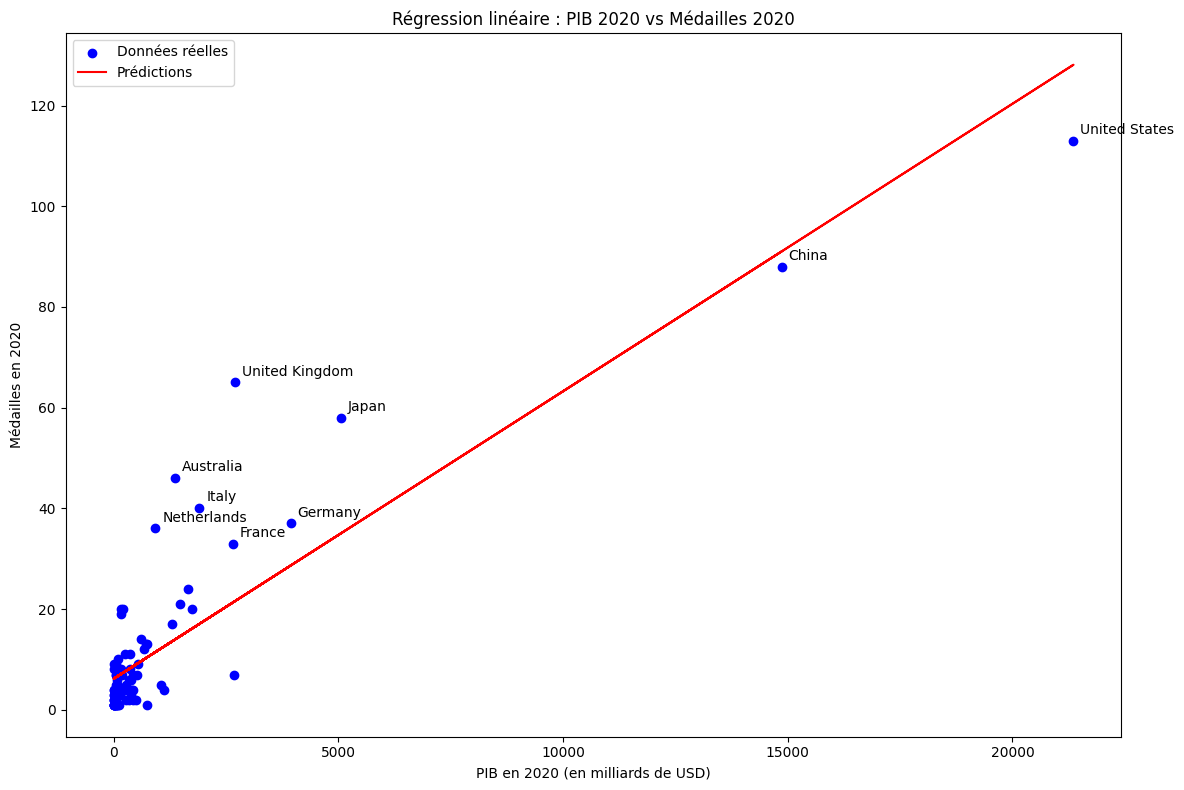


Coefficients du modèle :
Pente : 0.0057
Ordonnée à l'origine : 6.1501

Exemple des codes pays dans medals_total_df_2020:
  Country Code  Total
0          USA    113
1          CHN     88
2          JPN     58
3          GBR     65
4          ROC     71


In [ ]:
# 1. Imports nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from country_converter import CountryConverter

# 2. Charger les données depuis le fichier CSV
pib_pays = '/content/drive/My Drive/Projet_MIDL_3/imf-dm-export-20241229 (1) - NGDPD.csv'
data = pd.read_csv(pib_pays)

# 3. Remplacer les virgules par des points dans toutes les colonnes sauf "Country Name"
data.iloc[:, 1:] = data.iloc[:, 1:].replace(',', '.', regex=True)

# 4. Vérifier les colonnes
print("Colonnes disponibles :", data.columns)

# 5. Garder uniquement les colonnes nécessaires
data = data[["GDP, current prices (Billions of U.S. dollars)", "2020", "2024"]]

# 6. Renommer la colonne pour un accès plus simple
data.rename(columns={"GDP, current prices (Billions of U.S. dollars)": "Country Name"}, inplace=True)

# 7. Supprimer les lignes agrégées
excluded_countries = ["World", "Advanced economies", "Emerging market and developing economies"]
data = data[~data["Country Name"].isin(excluded_countries)]

# 8. Convertir les colonnes en numérique
data["2020"] = pd.to_numeric(data["2020"], errors='coerce')
data["2024"] = pd.to_numeric(data["2024"], errors='coerce')

# 9. Supprimer les lignes avec des valeurs manquantes
data = data.dropna(subset=["2020", "2024"])

# 10. Ajouter les codes pays IOC
print("Nombre de pays dans le dataset PIB initial:", len(data))
cc = CountryConverter()
data["country_code"] = data["Country Name"].apply(lambda x: cc.convert(names=x, to='IOC'))

# 11. Vérification des correspondances
print("Nombre de pays avec un code IOC:", data["country_code"].notna().sum())
print("\nPays sans code IOC:")
print(data[data["country_code"].isna()]["Country Name"].tolist())

# 12. Nettoyage des données avec codes manquants
data_clean = data.dropna(subset=["country_code"])

# 13. Fusion avec les données des médailles 2020
data_2020 = pd.merge(data_clean, medals_total_df_2020, left_on="country_code", right_on="Country Code")

# 14. Vérification de la fusion
print("\nNombre de pays après fusion avec les médailles:", len(data_2020))
print("\nPays présents dans le résultat final:")
print(data_2020[["Country Name", "country_code", "Total"]].head())

# 15. Régression linéaire
if len(data_2020) > 0:
    X = data_2020[["2020"]].values
    y = data_2020["Total"].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print("\nPerformance du modèle (2020) :")
    print(f"MSE : {mse}")
    print(f"R2 : {r2}")

    # 16. Visualisation
    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, color="blue", label="Données réelles")
    plt.plot(X, y_pred, color="red", label="Prédictions")
    plt.xlabel("PIB en 2020 (en milliards de USD)")
    plt.ylabel("Médailles en 2020")
    plt.title("Régression linéaire : PIB 2020 vs Médailles 2020")
    plt.legend()

    # 17. Annotations
    for i, (x, y_true, country) in enumerate(zip(X, y, data_2020["Country Name"])):
        if y_true > np.percentile(data_2020["Total"], 90):
            plt.annotate(country, (x[0], y_true), xytext=(5, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

    print("\nCoefficients du modèle :")
    print(f"Pente : {model.coef_[0]:.4f}")
    print(f"Ordonnée à l'origine : {model.intercept_:.4f}")
else:
    print("Pas assez de données pour la régression. Vérifiez la correspondance des codes pays.")

# 18. Diagnostic des données de médailles
print("\nExemple des codes pays dans medals_total_df_2020:")
print(medals_total_df_2020[["Country Code", "Total"]].head())

Regression 2024

Nombre de pays après fusion avec les médailles 2024: 86

Pays présents dans le résultat final:
  Country Name country_code  Total
0      Albania          ALB      2
1      Algeria          ALG      3
2    Argentina          ARG      3
3      Armenia          ARM      4
4    Australia          AUS     53

Performance du modèle (2024) :
MSE : 106.58356586370493
R2 : 0.735709440016213


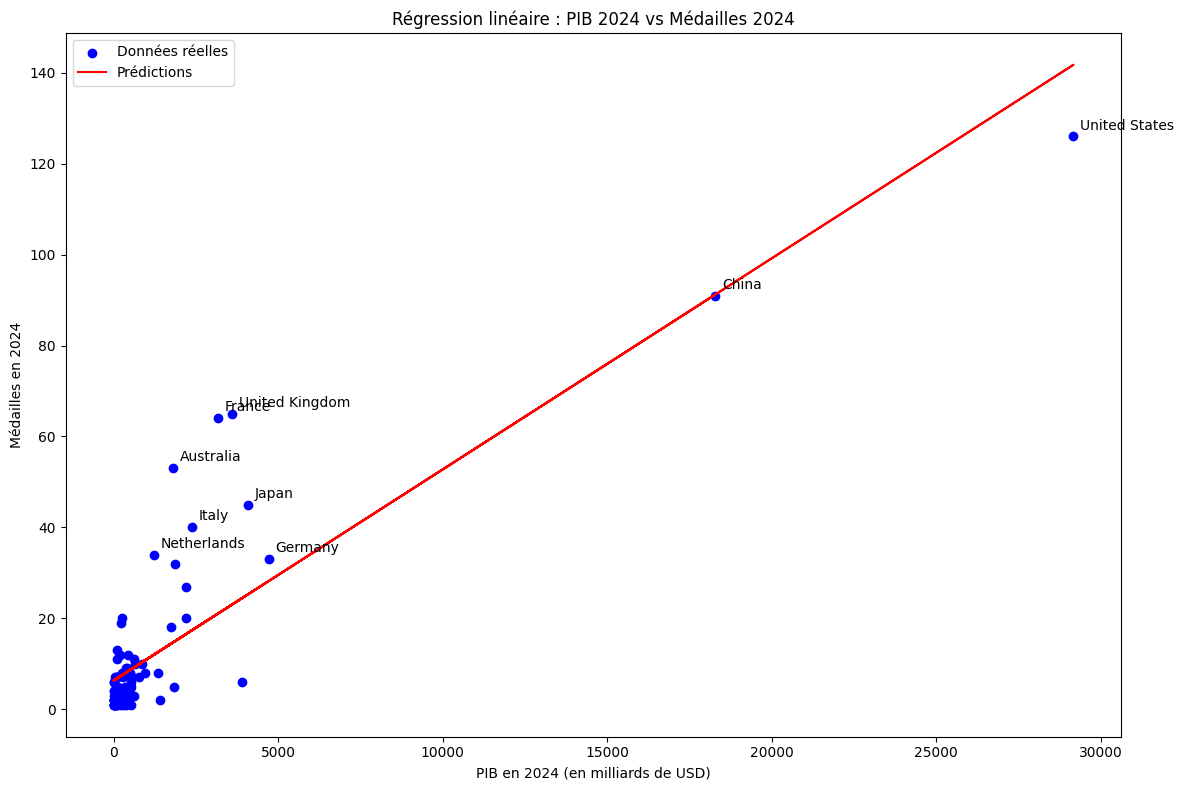


Coefficients du modèle 2024 :
Pente : 0.0046
Ordonnée à l'origine : 6.3188

Comparaison des modèles 2020 et 2024 :
R² 2020 : 0.7617
R² 2024 : 0.7357


In [ ]:
# 1. Préparation des données 2024
data_2024 = pd.merge(data_clean, medals_total_df_2024, on="country_code")  # On utilise directement "country_code"

# 2. Vérification de la fusion
print("Nombre de pays après fusion avec les médailles 2024:", len(data_2024))
print("\nPays présents dans le résultat final:")
print(data_2024[["Country Name", "country_code", "Total"]].head())

# Le reste du code reste identique
if len(data_2024) > 0:
    X_2024 = data_2024[["2024"]].values
    y_2024 = data_2024["Total"].values

    model_2024 = LinearRegression()
    model_2024.fit(X_2024, y_2024)

    y_pred_2024 = model_2024.predict(X_2024)
    mse_2024 = mean_squared_error(y_2024, y_pred_2024)
    r2_2024 = r2_score(y_2024, y_pred_2024)

    print("\nPerformance du modèle (2024) :")
    print(f"MSE : {mse_2024}")
    print(f"R2 : {r2_2024}")

    # Visualisation
    plt.figure(figsize=(12, 8))
    plt.scatter(X_2024, y_2024, color="blue", label="Données réelles")
    plt.plot(X_2024, y_pred_2024, color="red", label="Prédictions")
    plt.xlabel("PIB en 2024 (en milliards de USD)")
    plt.ylabel("Médailles en 2024")
    plt.title("Régression linéaire : PIB 2024 vs Médailles 2024")
    plt.legend()

    # Annotations
    for i, (x, y_true, country) in enumerate(zip(X_2024, y_2024, data_2024["Country Name"])):
        if y_true > np.percentile(data_2024["Total"], 90):
            plt.annotate(country, (x[0], y_true), xytext=(5, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

    print("\nCoefficients du modèle 2024 :")
    print(f"Pente : {model_2024.coef_[0]:.4f}")
    print(f"Ordonnée à l'origine : {model_2024.intercept_:.4f}")

    # Comparaison avec le modèle 2020
    print("\nComparaison des modèles 2020 et 2024 :")
    print(f"R² 2020 : {r2:.4f}")
    print(f"R² 2024 : {r2_2024:.4f}")
else:
    print("Pas assez de données pour la régression. Vérifiez la correspondance des codes pays.")

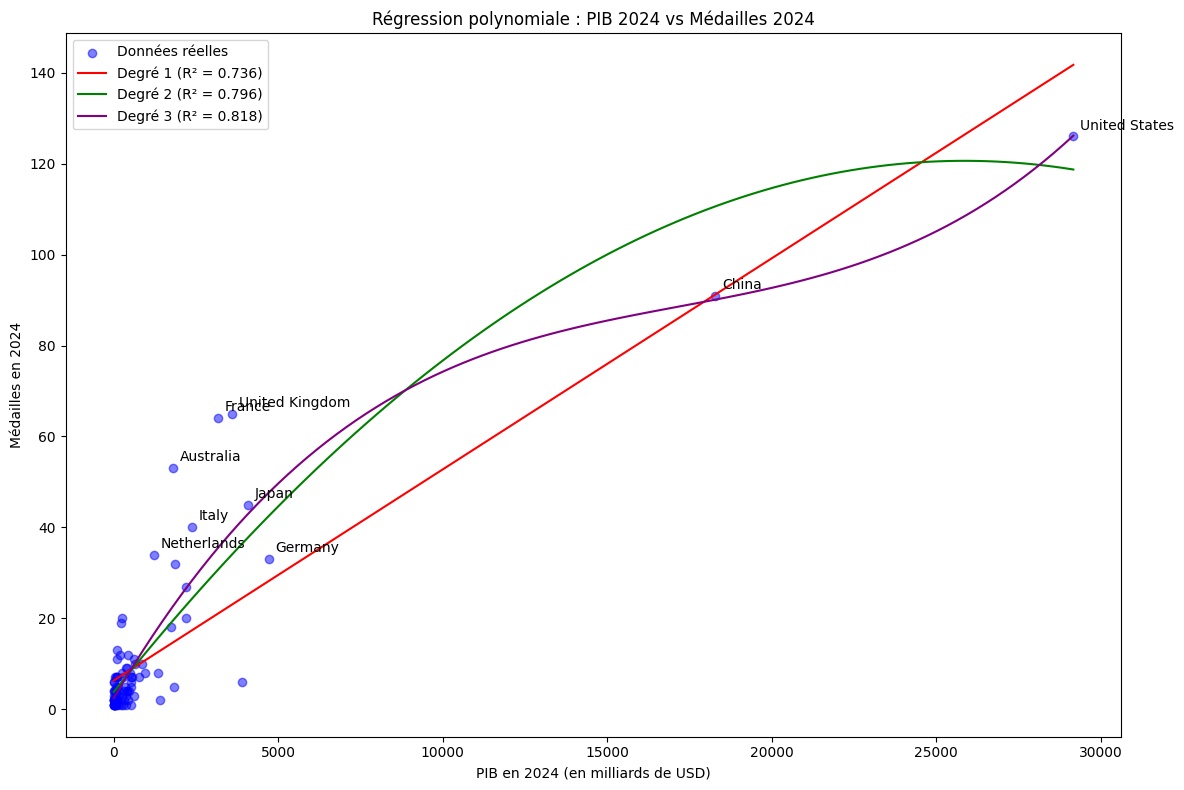


Scores des modèles polynomiaux :
Degré 1 - R² : 0.7357
Degré 2 - R² : 0.7961
Degré 3 - R² : 0.8181

Analyse des résidus pour le modèle de degré 1:

Pays les plus sous-estimés par le modèle:
           Country  Actual  Predicted   Residual
28          France      64  21.057070  42.942930
82  United Kingdom      65  22.976822  42.023178
4        Australia      53  14.686037  38.313963
41           Italy      40  17.353629  22.646371
55     Netherlands      34  11.976186  22.023814

Pays les plus surestimés par le modèle:
          Country  Actual   Predicted   Residual
36          India       6   24.377171 -18.377171
83  United States     126  141.753412 -15.753412
37      Indonesia       2   12.831430 -10.831430
52         Mexico       5   14.900181  -9.900181
69      Singapore       1    8.783024  -7.783024

Analyse des résidus pour le modèle de degré 2:

Pays les plus sous-estimés par le modèle:
           Country  Actual  Predicted   Residual
4        Australia      53  19.505655  3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Préparation des données 2024
data_2024 = pd.merge(data_clean, medals_total_df_2024, on="country_code")

# Création des variables pour la régression
X_2024 = data_2024[["2024"]].values
y_2024 = data_2024["Total"].values

# Création de plusieurs modèles polynomiaux (degrés 1 à 3)
degrees = [1, 2, 3]
models = {}
predictions = {}
scores = {}

# Création et évaluation des modèles
for degree in degrees:
    # Création du pipeline polynomial
    polynomial_model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )

    # Entraînement du modèle
    polynomial_model.fit(X_2024, y_2024)

    # Stockage du modèle et des prédictions
    models[degree] = polynomial_model
    predictions[degree] = polynomial_model.predict(X_2024)
    scores[degree] = r2_score(y_2024, predictions[degree])

# Visualisation
plt.figure(figsize=(12, 8))

# Données réelles
plt.scatter(X_2024, y_2024, color="blue", label="Données réelles", alpha=0.5)

# Créer une grille plus fine pour les courbes de prédiction
X_grid = np.linspace(X_2024.min(), X_2024.max(), 100).reshape(-1, 1)

# Tracer les prédictions pour chaque degré
colors = ['red', 'green', 'purple']
for degree, color in zip(degrees, colors):
    y_pred = models[degree].predict(X_grid)
    plt.plot(X_grid, y_pred, color=color,
            label=f'Degré {degree} (R² = {scores[degree]:.3f})')

plt.xlabel("PIB en 2024 (en milliards de USD)")
plt.ylabel("Médailles en 2024")
plt.title("Régression polynomiale : PIB 2024 vs Médailles 2024")
plt.legend()

# Annotations pour les points intéressants
for i, (x, y_true, country) in enumerate(zip(X_2024, y_2024, data_2024["Country Name"])):
    if y_true > np.percentile(y_2024, 90):
        plt.annotate(country, (x[0], y_true), xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Affichage des scores pour chaque modèle
print("\nScores des modèles polynomiaux :")
for degree in degrees:
    print(f"Degré {degree} - R² : {scores[degree]:.4f}")

# Afficher les 5 pays avec le plus grand écart entre prédiction et réalité
for degree in degrees:
    print(f"\nAnalyse des résidus pour le modèle de degré {degree}:")
    residuals = y_2024 - predictions[degree]
    residuals_df = pd.DataFrame({
        'Country': data_2024["Country Name"],
        'Actual': y_2024,
        'Predicted': predictions[degree],
        'Residual': residuals
    })

    print("\nPays les plus sous-estimés par le modèle:")
    print(residuals_df.nlargest(5, 'Residual')[['Country', 'Actual', 'Predicted', 'Residual']].to_string())

    print("\nPays les plus surestimés par le modèle:")
    print(residuals_df.nsmallest(5, 'Residual')[['Country', 'Actual', 'Predicted', 'Residual']].to_string())

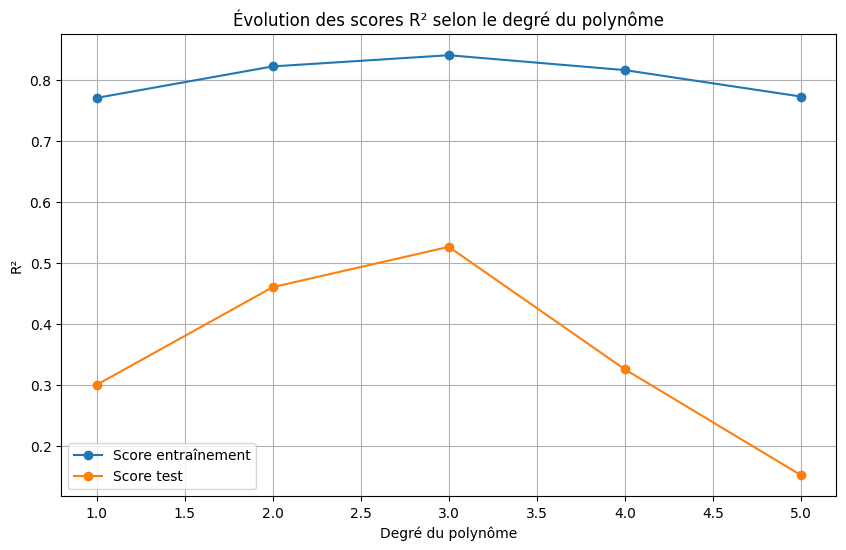


Comparaison des scores R² :
Degré 1:
  R² entraînement: 0.7709
  R² test: 0.2996
  Différence: 0.4714
Degré 2:
  R² entraînement: 0.8227
  R² test: 0.4601
  Différence: 0.3626
Degré 3:
  R² entraînement: 0.8411
  R² test: 0.5263
  Différence: 0.3147
Degré 4:
  R² entraînement: 0.8166
  R² test: 0.3251
  Différence: 0.4916
Degré 5:
  R² entraînement: 0.7732
  R² test: 0.1513
  Différence: 0.6219


In [ ]:
# 1. Séparation des données en train/test
from sklearn.model_selection import train_test_split

X = data_2024[["2024"]].values
y = data_2024["Total"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test de différents degrés
degrees = [1, 2, 3, 4, 5]  # Ajout de degrés plus élevés pour mieux voir l'overfitting
train_scores = []
test_scores = []

for degree in degrees:
    polynomial_model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )

    # Entraînement sur les données d'entraînement
    polynomial_model.fit(X_train, y_train)

    # Calcul des scores sur les données d'entraînement et de test
    train_score = polynomial_model.score(X_train, y_train)
    test_score = polynomial_model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', label='Score entraînement')
plt.plot(degrees, test_scores, 'o-', label='Score test')
plt.xlabel('Degré du polynôme')
plt.ylabel('R²')
plt.title('Évolution des scores R² selon le degré du polynôme')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des scores
print("\nComparaison des scores R² :")
for degree, train_score, test_score in zip(degrees, train_scores, test_scores):
    print(f"Degré {degree}:")
    print(f"  R² entraînement: {train_score:.4f}")
    print(f"  R² test: {test_score:.4f}")
    print(f"  Différence: {train_score - test_score:.4f}")

# Regression avec l'évolution des médailles et pib


Performance du modèle d'évolution :
MSE : 6389.663229251775
R2 : 0.00059978610289535


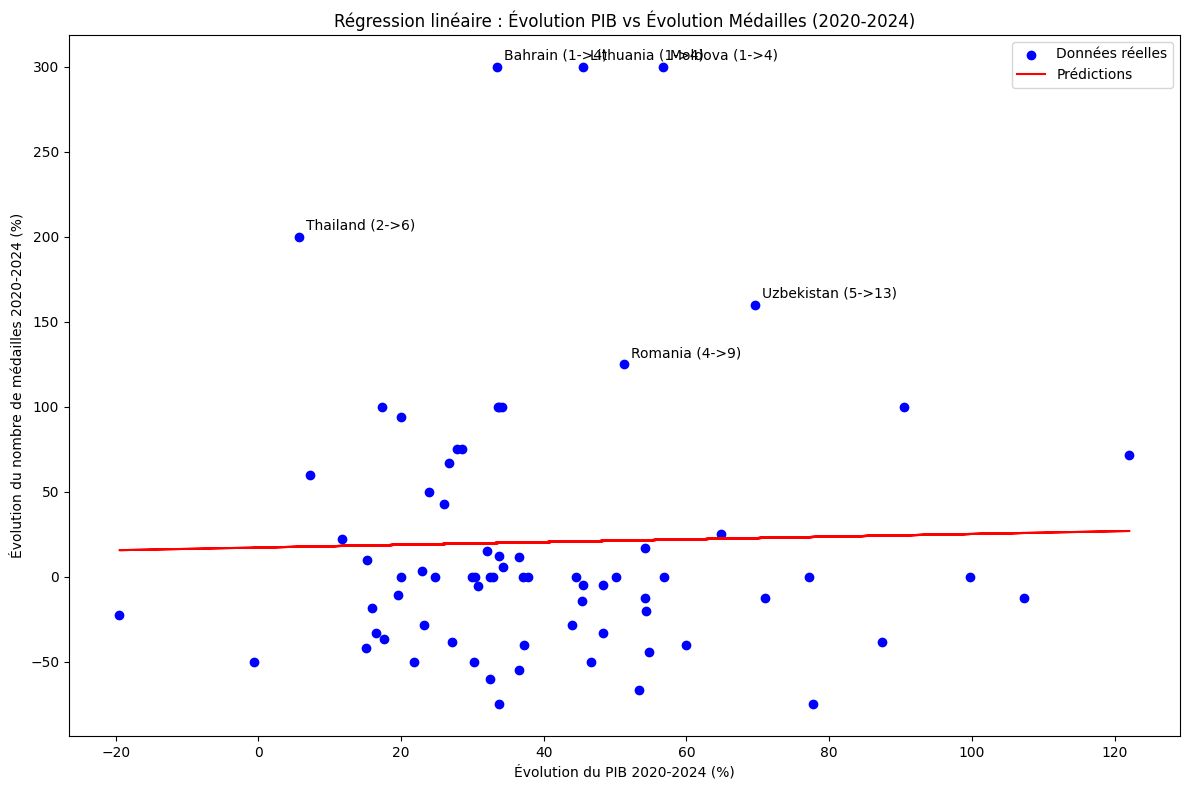


Coefficients du modèle d'évolution :
Pente : 0.0798
Ordonnée à l'origine : 17.2223

Pays avec les plus grandes variations (positives ou négatives) :

Top 5 des plus fortes augmentations :
   Country Name  Total_2020  Total_2024  medals_evolution_pct  pib_evolution_pct
5       Bahrain           1           4                 300.0          33.411463
43    Lithuania           1           4                 300.0          45.568196
46      Moldova           1           4                 300.0          56.652212
64     Thailand           2           6                 200.0           5.677911
71   Uzbekistan           5          13                 160.0          69.548335

Top 5 des plus fortes diminutions :
       Country Name  Total_2020  Total_2024  medals_evolution_pct  pib_evolution_pct
14   Czech Republic          11           5            -54.545455          36.590339
30        Indonesia           5           2            -60.000000          32.437881
55            Qatar           3  

In [ ]:
# Calcul de l'évolution du PIB et fusion des données
data_evolution = data_clean.copy()
data_evolution["pib_evolution_pct"] = ((data_evolution["2024"] - data_evolution["2020"]) / data_evolution["2020"]) * 100

# Fusion des données de médailles 2020 et 2024
medals_evolution = pd.merge(medals_total_df_2020, medals_total_df_2024,
                         left_on="Country Code", right_on="country_code",
                         suffixes=('_2020', '_2024'))

# Calcul de l'évolution des médailles
medals_evolution["medals_evolution_pct"] = ((medals_evolution["Total_2024"] - medals_evolution["Total_2020"]) / medals_evolution["Total_2020"]) * 100

# Fusion finale des évolutions PIB et médailles
final_data = pd.merge(data_evolution, medals_evolution,
                    left_on="country_code", right_on="Country Code")

# Régression
X_evolution = final_data[["pib_evolution_pct"]].values
y_evolution = final_data["medals_evolution_pct"].values

model_evolution = LinearRegression()
model_evolution.fit(X_evolution, y_evolution)

# Prédictions et métriques
y_pred_evolution = model_evolution.predict(X_evolution)
mse_evolution = mean_squared_error(y_evolution, y_pred_evolution)
r2_evolution = r2_score(y_evolution, y_pred_evolution)

print("\nPerformance du modèle d'évolution :")
print(f"MSE : {mse_evolution}")
print(f"R2 : {r2_evolution}")

# Visualisation
plt.figure(figsize=(12, 8))
plt.scatter(X_evolution, y_evolution, color="blue", label="Données réelles")
plt.plot(X_evolution, y_pred_evolution, color="red", label="Prédictions")
plt.xlabel("Évolution du PIB 2020-2024 (%)")
plt.ylabel("Évolution du nombre de médailles 2020-2024 (%)")
plt.title("Régression linéaire : Évolution PIB vs Évolution Médailles (2020-2024)")
plt.legend()

# Annotations pour les cas intéressants
for i, (x, y_true, country) in enumerate(zip(X_evolution, y_evolution, final_data["Country Name"])):
   if abs(y_true) > np.percentile(abs(y_evolution), 90):
       plt.annotate(f"{country} ({int(final_data.iloc[i]['Total_2020'])}->{int(final_data.iloc[i]['Total_2024'])})",
                   (x[0], y_true),
                   xytext=(5, 5),
                   textcoords='offset points')

plt.tight_layout()
plt.show()

# Affichage des coefficients
print("\nCoefficients du modèle d'évolution :")
print(f"Pente : {model_evolution.coef_[0]:.4f}")
print(f"Ordonnée à l'origine : {model_evolution.intercept_:.4f}")

# Affichage des cas les plus intéressants
print("\nPays avec les plus grandes variations (positives ou négatives) :")
final_data_summary = final_data.sort_values(by="medals_evolution_pct", ascending=False)
print("\nTop 5 des plus fortes augmentations :")
print(final_data_summary[["Country Name", "Total_2020", "Total_2024", "medals_evolution_pct", "pib_evolution_pct"]].head().to_string())
print("\nTop 5 des plus fortes diminutions :")
print(final_data_summary[["Country Name", "Total_2020", "Total_2024", "medals_evolution_pct", "pib_evolution_pct"]].tail().to_string())

# Arbres

R² score : 0.696749870389781
RMSE : 14.314733847272109

Importance des features :
             feature  importance
0        nb_athletes    0.848580
5           pib_2024    0.139493
3       ratio_femmes    0.011927
1  participated_2020    0.000000
2     nb_disciplines    0.000000
4          age_moyen    0.000000


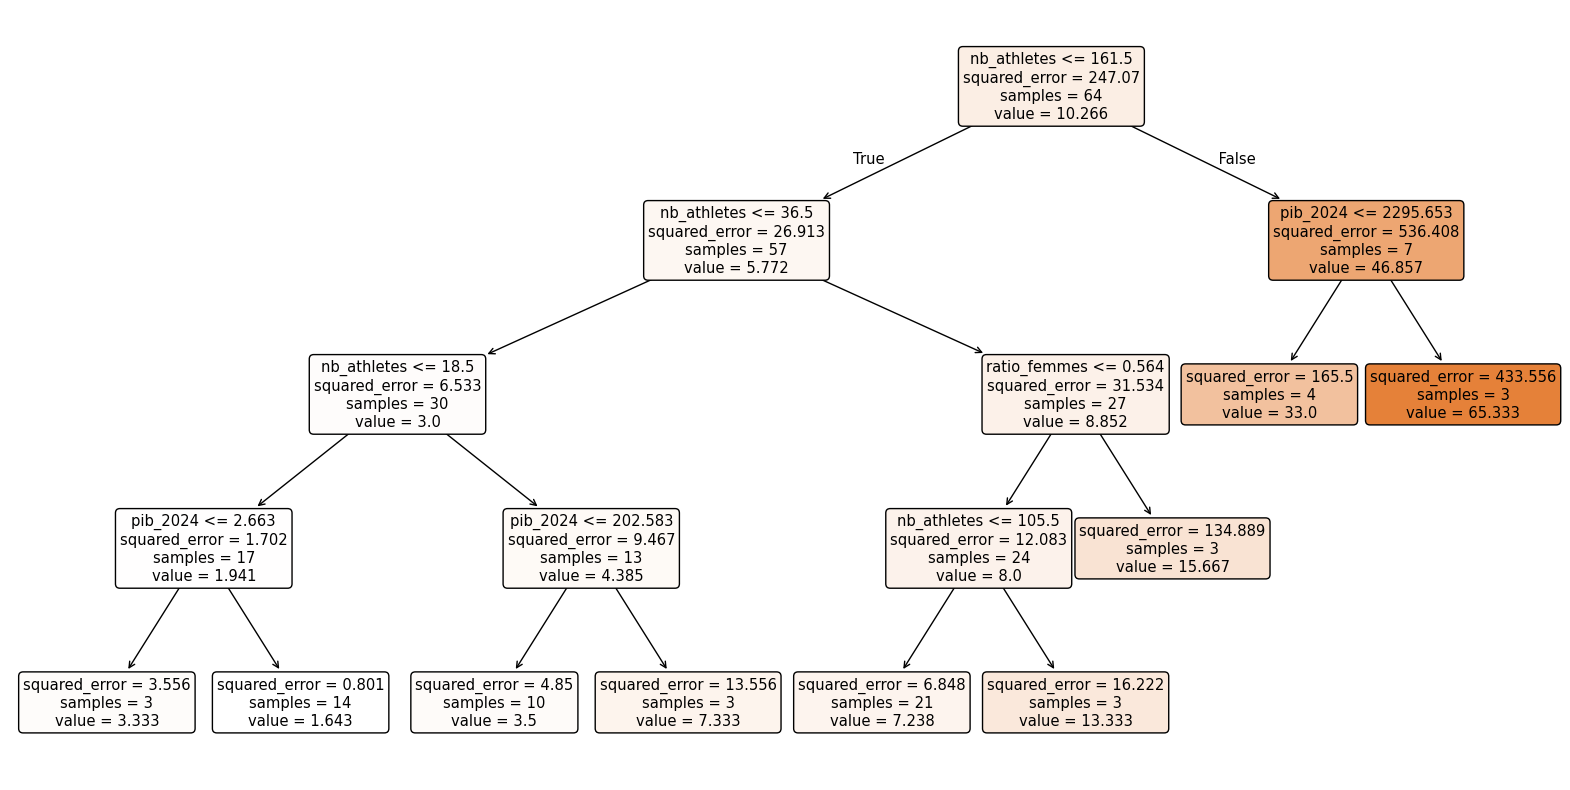


Comparaison des performances train/test :
R² train: 0.8310918714911208
R² test: 0.696749870389781
RMSE train: 6.460042016670082
RMSE test: 14.314733847272109


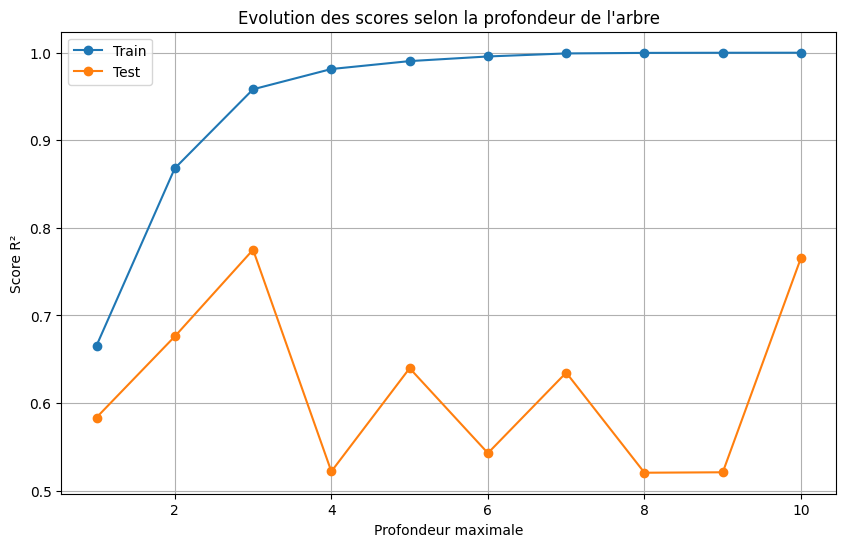

In [ ]:
# 1. Agrégation des médailles et features par pays
from sklearn.tree import DecisionTreeRegressor, plot_tree
medals_by_country_2024 = medals_df_2024.groupby('country').agg({
    'medal_type': 'count',
    'country': 'first',
    'country_code': 'first'
}).rename(columns={'medal_type': 'total_medals'})

pays_features = athletes_df_2024.groupby('country').agg({
    'name': 'count',
    'participated_2020': 'mean',
    'disciplines': lambda x: len(set([item for sublist in x for item in eval(sublist)])),
    'gender': lambda x: (x == 'Female').mean(),
    'birth_date': lambda x: (pd.Timestamp.now() - pd.to_datetime(x)).mean().days / 365,
    'country_code': 'first'
}).rename(columns={
    'name': 'nb_athletes',
    'gender': 'ratio_femmes',
    'birth_date': 'age_moyen',
    'disciplines': 'nb_disciplines'
})

# 2. Fusion des données
df_final = pd.merge(medals_by_country_2024, pays_features, left_index=True, right_index=True)

# 3. Ajout du PIB
if 'data_clean' in globals():
    df_final = pd.merge(
        df_final,
        data_clean[['country_code', '2024']],
        left_on='country_code_x',
        right_on='country_code',
        how='left'
    ).rename(columns={'2024': 'pib_2024'})

# 4. Modélisation
features = ['nb_athletes', 'participated_2020', 'nb_disciplines', 'ratio_femmes', 'age_moyen']
if 'pib_2024' in df_final.columns:
    features.append('pib_2024')

X = df_final[features]
y = df_final['total_medals']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regr = DecisionTreeRegressor(max_depth=4, min_samples_split=5, min_samples_leaf=3, random_state=42)
regr.fit(X_train, y_train)

# 5. Résultats
print("R² score :", r2_score(y_test, regr.predict(X_test)))
print("RMSE :", np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))
print("\nImportance des features :")
print(pd.DataFrame({
    'feature': features,
    'importance': regr.feature_importances_
}).sort_values('importance', ascending=False))

# 6. Visualisation
plt.figure(figsize=(20, 10))
plot_tree(regr, feature_names=features, filled=True, rounded=True)
plt.show()




# Après l'entraînement du modèle, ajoutons ces lignes :

# 1. Comparaison des scores train vs test
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print("\nComparaison des performances train/test :")
print("R² train:", r2_score(y_train, y_train_pred))
print("R² test:", r2_score(y_test, y_test_pred))
print("RMSE train:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# 2. Courbe de complexité d'apprentissage
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    regr, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)

# Moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score d\'entraînement')
plt.plot(train_sizes, test_mean, label='Score de validation')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Score R²')
plt.title('Courbe d\'apprentissage')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 3. Impact de la profondeur de l'arbre
max_depths = range(1, 11)
train_scores = []
test_scores = []

for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_scores.append(r2_score(y_train, tree.predict(X_train)))
    test_scores.append(r2_score(y_test, tree.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Train')
plt.plot(max_depths, test_scores, 'o-', label='Test')
plt.xlabel('Profondeur maximale')
plt.ylabel('Score R²')
plt.title('Evolution des scores selon la profondeur de l\'arbre')
plt.legend()
plt.grid(True)
plt.show()

Résultats selon la profondeur de l'arbre:

Profondeur: 3
Train R²: 0.085
Test R²: 0.059
Train RMSE: 0.370
Test RMSE: 0.358

Profondeur: 4
Train R²: 0.108
Test R²: 0.077
Train RMSE: 0.365
Test RMSE: 0.355

Profondeur: 5
Train R²: 0.142
Test R²: 0.092
Train RMSE: 0.358
Test RMSE: 0.352

Profondeur: 6
Train R²: 0.191
Test R²: 0.133
Train RMSE: 0.347
Test RMSE: 0.344

Profondeur: 7
Train R²: 0.234
Test R²: 0.156
Train RMSE: 0.338
Test RMSE: 0.339

Profondeur: 8
Train R²: 0.282
Test R²: 0.183
Train RMSE: 0.327
Test RMSE: 0.334

Profondeur: 9
Train R²: 0.346
Test R²: 0.200
Train RMSE: 0.312
Test RMSE: 0.330

Profondeur: 10
Train R²: 0.419
Test R²: 0.212
Train RMSE: 0.294
Test RMSE: 0.328

Profondeur: 11
Train R²: 0.495
Test R²: 0.193
Train RMSE: 0.274
Test RMSE: 0.332

Profondeur: 12
Train R²: 0.554
Test R²: 0.162
Train RMSE: 0.258
Test RMSE: 0.338

Profondeur: 13
Train R²: 0.596
Test R²: 0.144
Train RMSE: 0.246
Test RMSE: 0.341

Profondeur: 14
Train R²: 0.626
Test R²: 0.135
Train RMSE: 0.23

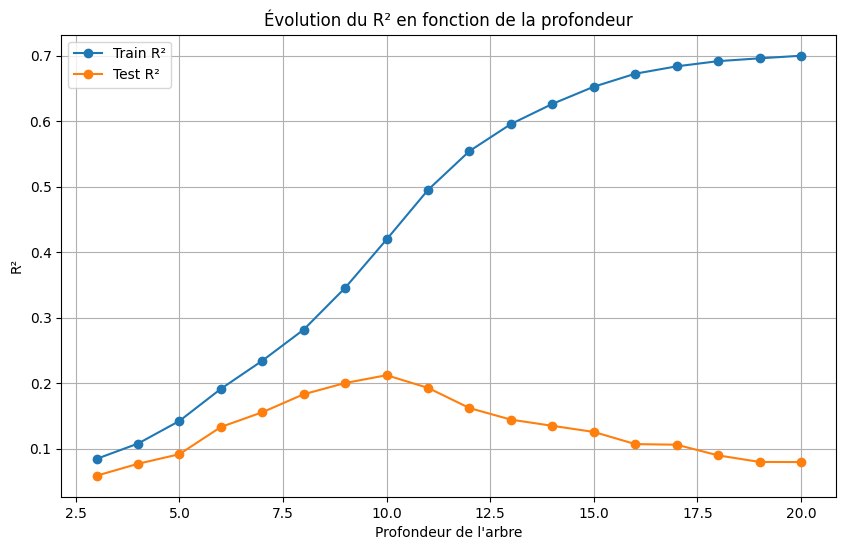

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 1. Préparation des données 2024
medals_2024_indiv = medals_df_2024[medals_df_2024['event_type'].isin(['HATH', 'ATH'])]
medailles_par_athlete_2024 = medals_2024_indiv.groupby('name')['medal_type'].count().reset_index()
medailles_par_athlete_2024['annee'] = 2024
medailles_par_athlete_2024.rename(columns={'medal_type': 'nb_medals'}, inplace=True)

# 2. Préparation des données 2020
medailles_par_athlete_2020 = medals_df_2020.groupby('athlete_name')['medal_type'].count().reset_index()
medailles_par_athlete_2020['annee'] = 2020
medailles_par_athlete_2020.rename(columns={
    'medal_type': 'nb_medals',
    'athlete_name': 'name'
}, inplace=True)

# 3. Préparation des features enrichies pour chaque année
def process_athletes_data(athletes_df, year, data_clean):
    df = athletes_df.copy()

    # Features de base
    df['age'] = (pd.to_datetime(f'{year}-07-26') - pd.to_datetime(df['birth_date'])).dt.days / 365
    df['annee'] = year

    # Features de discipline en tenant compte des différents noms de colonnes
    if year == 2024:
        df['nb_disciplines'] = df['disciplines'].apply(lambda x: len(eval(x)))
        df['same_residence'] = (df['residence_country'] == df['country']).astype(int)
        df['same_birth'] = (df['birth_country'] == df['country']).astype(int)
        discipline_col = 'disciplines'
    else:
        df['nb_disciplines'] = 1
        df['same_residence'] = 1
        df['same_birth'] = 1
        df['residence_country'] = df['country']
        df['birth_country'] = df['country']
        discipline_col = 'discipline'

    # Features par pays
    df['athletes_per_country'] = df.groupby('country')['name'].transform('count')

    # Features par discipline en utilisant la bonne colonne
    df['athletes_per_discipline'] = df.groupby(discipline_col)['name'].transform('count')
    df['disciplines_per_country'] = df.groupby('country')[discipline_col].transform('nunique')

    # Ajout du PIB
    if data_clean is not None:
        pib_data = data_clean[['country_code', str(year)]].rename(columns={str(year): 'pib'})
        df = df.merge(pib_data, on='country_code', how='left')
        df['pib'] = df['pib'].fillna(df['pib'].mean())  # Remplir les valeurs manquantes avec la moyenne
        df['pib_per_athlete'] = df['pib'] / df['athletes_per_country']  # PIB par athlète

    return df
# 4. Processing des données
athletes_2024_enriched = process_athletes_data(athletes_df_2024, 2024, data_clean)
athletes_2020_enriched = process_athletes_data(athletes_df_2020, 2020, data_clean)

# 5. Fusion avec les médailles
athletes_2024_final = pd.merge(athletes_2024_enriched, medailles_par_athlete_2024, on=['name', 'annee'], how='left')
athletes_2020_final = pd.merge(athletes_2020_enriched, medailles_par_athlete_2020, on=['name', 'annee'], how='left')

# 6. Combinaison des données
features_to_keep = [
    'name', 'age', 'gender', 'country', 'country_code',
    'nb_disciplines', 'same_residence', 'same_birth',
    'athletes_per_country', 'athletes_per_discipline',
    'disciplines_per_country', 'pib', 'pib_per_athlete',
    'nb_medals', 'annee'
]

athletes_combined = pd.concat([
    athletes_2020_final[features_to_keep],
    athletes_2024_final[features_to_keep]
])
athletes_combined['nb_medals'] = athletes_combined['nb_medals'].fillna(0)

# 7. Encodage des variables catégorielles
categorical_columns = ['gender', 'country', 'country_code']
for col in categorical_columns:
    le = LabelEncoder()
    athletes_combined[f'{col}_encoded'] = le.fit_transform(athletes_combined[col])

# 8. Features finales
numerical_features = [
    'age', 'nb_disciplines', 'same_residence', 'same_birth',
    'athletes_per_country', 'athletes_per_discipline',
    'disciplines_per_country', 'pib', 'pib_per_athlete'
]
encoded_features = [f'{col}_encoded' for col in categorical_columns]
features = numerical_features + encoded_features

# 9. Modélisation
X = athletes_combined[features]
y = athletes_combined['nb_medals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Le code reste le même jusqu'à la partie modélisation. Voici la modification :

# Test de nombreuses profondeurs
max_depths = range(3, 21)  # Test des profondeurs de 3 à 20
results = []

for depth in max_depths:
   regr = DecisionTreeRegressor(
       max_depth=depth,
       min_samples_split=5,
       min_samples_leaf=3,
       random_state=42
   )
   regr.fit(X_train, y_train)

   y_train_pred = regr.predict(X_train)
   y_test_pred = regr.predict(X_test)

   results.append({
       'depth': depth,
       'train_r2': r2_score(y_train, y_train_pred),
       'test_r2': r2_score(y_test, y_test_pred),
       'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
       'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
   })

# Affichage des résultats
print("Résultats selon la profondeur de l'arbre:")
for result in results:
   print(f"\nProfondeur: {result['depth']}")
   print(f"Train R²: {result['train_r2']:.3f}")
   print(f"Test R²: {result['test_r2']:.3f}")
   print(f"Train RMSE: {result['train_rmse']:.3f}")
   print(f"Test RMSE: {result['test_rmse']:.3f}")

# Trouver la meilleure profondeur selon le R² test
best_result = max(results, key=lambda x: x['test_r2'])
print("\nMeilleurs résultats obtenus avec:")
print(f"Profondeur: {best_result['depth']}")
print(f"Train R²: {best_result['train_r2']:.3f}")
print(f"Test R²: {best_result['test_r2']:.3f}")
print(f"Train RMSE: {best_result['train_rmse']:.3f}")
print(f"Test RMSE: {best_result['test_rmse']:.3f}")

# Modèle final avec la meilleure profondeur
best_depth = best_result['depth']
final_model = DecisionTreeRegressor(
   max_depth=best_depth,
   min_samples_split=5,
   min_samples_leaf=3,
   random_state=42
)
final_model.fit(X_train, y_train)

# Importance des features
feature_importance = pd.DataFrame({
   'feature': features,
   'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nImportance des features :")
print(feature_importance)

# Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(final_model, feature_names=features, filled=True, rounded=True)
plt.show()

# Plot de l'évolution des R² en fonction de la profondeur
plt.figure(figsize=(10, 6))
depths = [r['depth'] for r in results]
train_scores = [r['train_r2'] for r in results]
test_scores = [r['test_r2'] for r in results]

plt.plot(depths, train_scores, label='Train R²', marker='o')
plt.plot(depths, test_scores, label='Test R²', marker='o')
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('R²')
plt.title('Évolution du R² en fonction de la profondeur')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Chargement des données
file_path_athletes2024 = '/content/drive/My Drive/Projet_MIDL_3/DataParis/athletes (1).csv'
file_path_medals2024 = '/content/drive/My Drive/Projet_MIDL_3/DataParis/medals.csv'


# Charger les fichiers CSV avec pandas
athletes_df_2024 = pd.read_csv(file_path_athletes2024)
medals_df_2024 = pd.read_csv(file_path_medals2024)

# 2. Création des features binaires avant toute suppression
binary_features = ['reason', 'sporting_relatives', 'other_sports', 'coach', 'education']
for feature in binary_features:
   if feature in athletes_df_2024.columns:
       athletes_df_2024[f'{feature}_binary'] = athletes_df_2024[feature].notna().astype(int)

# 3. Gestion des valeurs manquantes
def handle_missing_data(df, strategies):
   df = df.copy()
   for column, strategy in strategies.items():
       if strategy == "drop_rows" and column in df.columns:
           df = df.dropna(subset=[column])
   return df

strategies_athletes = {
   "birth_country": "drop_rows",
   "residence_country": "drop_rows"
}

athletes_df_2024 = handle_missing_data(athletes_df_2024, strategies_athletes)

# 4. Ajout des features sur les disciplines
athletes_df_2024['nb_disciplines'] = athletes_df_2024['disciplines'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
athletes_df_2024['discipline'] = athletes_df_2024['disciplines'].apply(lambda x: eval(x)[0] if pd.notna(x) else None)

# 5. Features par pays et discipline
athletes_df_2024['athletes_per_country'] = athletes_df_2024.groupby('country')['name'].transform('count')
athletes_df_2024['athletes_per_discipline'] = athletes_df_2024.groupby('discipline')['name'].transform('count')
athletes_df_2024['disciplines_per_country'] = athletes_df_2024.groupby('country')['discipline'].transform('nunique')

# 6. Calcul de l'âge
athletes_df_2024['birth_date'] = pd.to_datetime(athletes_df_2024['birth_date'], errors='coerce')
athletes_df_2024['age'] = (pd.Timestamp('2024-07-26') - athletes_df_2024['birth_date']).dt.days / 365

# 7. Encodage des variables catégorielles
le_gender = LabelEncoder()
le_country = LabelEncoder()
le_birth = LabelEncoder()
le_residence = LabelEncoder()

athletes_df_2024['gender_encoded'] = le_gender.fit_transform(athletes_df_2024['gender'])
athletes_df_2024['country_encoded'] = le_country.fit_transform(athletes_df_2024['country'])
athletes_df_2024['birth_country_encoded'] = le_birth.fit_transform(athletes_df_2024['birth_country'])
athletes_df_2024['residence_country_encoded'] = le_residence.fit_transform(athletes_df_2024['residence_country'])

# 8. Ajouter l'année
athletes_df_2024['annee'] = 2024

print("Colonnes disponibles après prétraitement :")
print(sorted(athletes_df_2024.columns.tolist()))

Colonnes disponibles après prétraitement :
['age', 'annee', 'athletes_per_country', 'athletes_per_discipline', 'birth_country', 'birth_country_encoded', 'birth_date', 'birth_place', 'coach', 'coach_binary', 'code', 'country', 'country_code', 'country_encoded', 'country_long', 'current', 'discipline', 'disciplines', 'disciplines_per_country', 'education', 'education_binary', 'events', 'family', 'function', 'gender', 'gender_encoded', 'height', 'hero', 'hobbies', 'influence', 'lang', 'name', 'name_short', 'name_tv', 'nationality', 'nationality_code', 'nationality_long', 'nb_disciplines', 'nickname', 'occupation', 'other_sports', 'other_sports_binary', 'philosophy', 'reason', 'reason_binary', 'residence_country', 'residence_country_encoded', 'residence_place', 'ritual', 'sporting_relatives', 'sporting_relatives_binary', 'weight']


In [ ]:
# 1. Préparation des données PIB
pib_pays = '/content/drive/My Drive/Projet_MIDL_3/imf-dm-export-20241229 (1) - NGDPD.csv'
data = pd.read_csv(pib_pays)

# Nettoyage des données PIB
data.iloc[:, 1:] = data.iloc[:, 1:].replace(',', '.', regex=True)
data = data[["GDP, current prices (Billions of U.S. dollars)", "2020", "2024"]]
data.rename(columns={"GDP, current prices (Billions of U.S. dollars)": "Country Name"}, inplace=True)

# Suppression des lignes agrégées
excluded_countries = ["World", "Advanced economies", "Emerging market and developing economies"]
data = data[~data["Country Name"].isin(excluded_countries)]

# Conversion en numérique
data["2020"] = pd.to_numeric(data["2020"], errors='coerce')
data["2024"] = pd.to_numeric(data["2024"], errors='coerce')
data = data.dropna(subset=["2020", "2024"])

# Ajout des codes pays IOC
cc = CountryConverter()
data["country_code"] = data["Country Name"].apply(lambda x: cc.convert(names=x, to='IOC'))
data_clean = data.dropna(subset=["country_code"])

# 2. Préparation des données athlètes avec le même code que précédemment
# Création des features binaires
binary_features = ['reason', 'sporting_relatives', 'other_sports', 'coach', 'education']
for feature in binary_features:
    if feature in athletes_df_2024.columns:
        athletes_df_2024[f'{feature}_binary'] = athletes_df_2024[feature].notna().astype(int)

# Gestion des valeurs manquantes
strategies_athletes = {
    "birth_country": "drop_rows",
    "residence_country": "drop_rows"
}

athletes_df_2024 = handle_missing_data(athletes_df_2024, strategies_athletes)

# Features disciplines
athletes_df_2024['nb_disciplines'] = athletes_df_2024['disciplines'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
athletes_df_2024['discipline'] = athletes_df_2024['disciplines'].apply(lambda x: eval(x)[0] if pd.notna(x) else None)

# Features par pays et discipline
athletes_df_2024['athletes_per_country'] = athletes_df_2024.groupby('country')['name'].transform('count')
athletes_df_2024['athletes_per_discipline'] = athletes_df_2024.groupby('discipline')['name'].transform('count')
athletes_df_2024['disciplines_per_country'] = athletes_df_2024.groupby('country')['discipline'].transform('nunique')

# Calcul de l'âge
athletes_df_2024['birth_date'] = pd.to_datetime(athletes_df_2024['birth_date'], errors='coerce')
athletes_df_2024['age'] = (pd.Timestamp('2024-07-26') - athletes_df_2024['birth_date']).dt.days / 365

# Encodage
le_gender = LabelEncoder()
le_country = LabelEncoder()
le_birth = LabelEncoder()
le_residence = LabelEncoder()

athletes_df_2024['gender_encoded'] = le_gender.fit_transform(athletes_df_2024['gender'])
athletes_df_2024['country_encoded'] = le_country.fit_transform(athletes_df_2024['country'])
athletes_df_2024['birth_country_encoded'] = le_birth.fit_transform(athletes_df_2024['birth_country'])
athletes_df_2024['residence_country_encoded'] = le_residence.fit_transform(athletes_df_2024['residence_country'])

# 3. Ajout du PIB aux données athlètes
pib_data = data_clean[['country_code', '2024']].rename(columns={'2024': 'pib'})
athletes_df_2024 = athletes_df_2024.merge(pib_data, left_on='country_code', right_on='country_code', how='left')
athletes_df_2024['pib'] = athletes_df_2024['pib'].fillna(athletes_df_2024['pib'].mean())

# Ajout de l'année
athletes_df_2024['annee'] = 2024

print("Prétraitement terminé. Colonnes disponibles :")
print(sorted(athletes_df_2024.columns.tolist()))

Prétraitement terminé. Colonnes disponibles :
['age', 'annee', 'athletes_per_country', 'athletes_per_discipline', 'birth_country', 'birth_country_encoded', 'birth_date', 'birth_place', 'coach', 'coach_binary', 'code', 'country', 'country_code', 'country_encoded', 'country_long', 'current', 'discipline', 'disciplines', 'disciplines_per_country', 'education', 'education_binary', 'events', 'family', 'function', 'gender', 'gender_encoded', 'height', 'hero', 'hobbies', 'influence', 'lang', 'name', 'name_short', 'name_tv', 'nationality', 'nationality_code', 'nationality_long', 'nb_disciplines', 'nickname', 'occupation', 'other_sports', 'other_sports_binary', 'philosophy', 'pib', 'reason', 'reason_binary', 'residence_country', 'residence_country_encoded', 'residence_place', 'ritual', 'sporting_relatives', 'sporting_relatives_binary', 'weight']


Disciplines avec une moyenne de médailles > 0:
Artistic Gymnastics: 0.067
Athletics: 0.005
Badminton: 0.014
Boxing: 0.035
Breaking: 0.231
Cycling BMX Freestyle: 0.048
Diving: 0.082
Fencing: 0.019
Golf: 0.021
Judo: 0.029
Rhythmic Gymnastics: 0.036
Shooting: 0.044
Skateboarding: 0.054
Sport Climbing: 0.037
Swimming: 0.017
Table Tennis: 0.037
Taekwondo: 0.037
Trampoline Gymnastics: 0.074
Weightlifting: 0.095
Wrestling: 0.098

Meilleurs résultats obtenus avec:
Profondeur: 5
Train R²: 0.415
Test R²: 0.191
Train RMSE: 0.123
Test RMSE: 0.186

Importance des features :
                      feature  importance
15         discipline_encoded    0.376385
2        athletes_per_country    0.210372
5                         pib    0.208432
0                         age    0.115514
14  residence_country_encoded    0.070649
3     athletes_per_discipline    0.007615
4     disciplines_per_country    0.007397
7   sporting_relatives_binary    0.003637
1              nb_disciplines    0.000000
6           

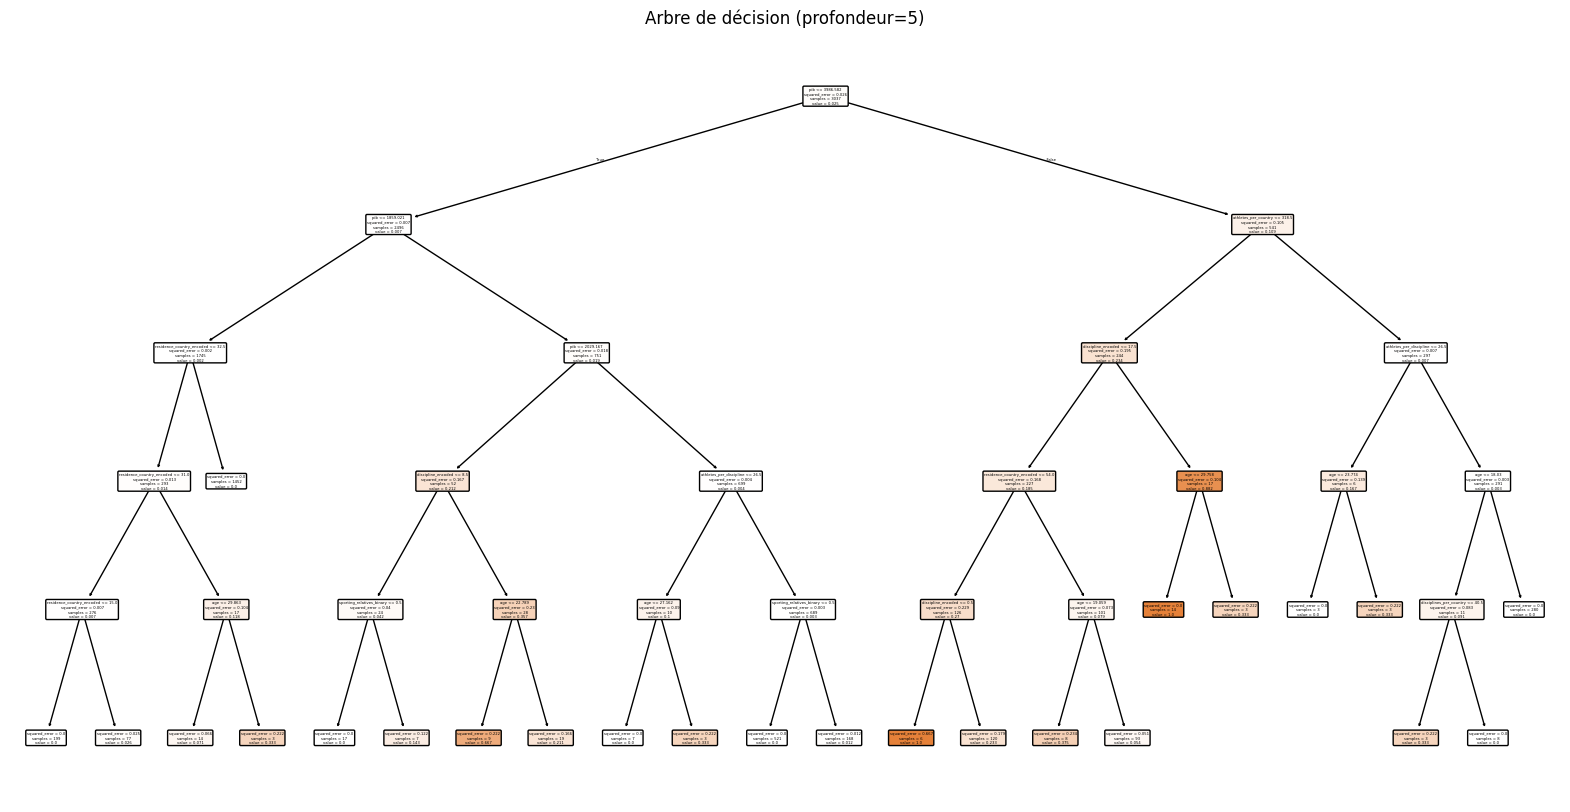

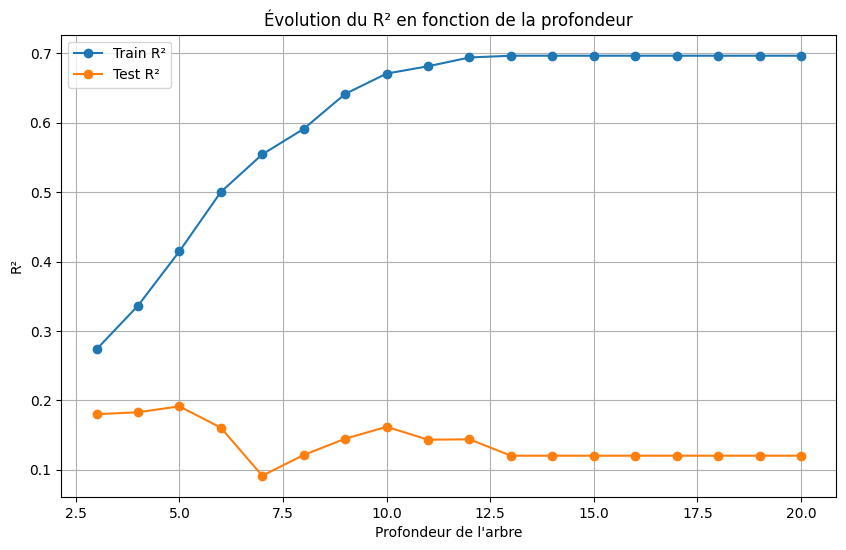

In [ ]:
# 1. Préparation des données de médailles pour les sports individuels
medals_2024_indiv = medals_df_2024[medals_df_2024['event_type'].isin(['HATH', 'ATH'])].copy()
medailles_par_athlete_2024 = medals_2024_indiv.groupby('name')['medal_type'].count().reset_index()
medailles_par_athlete_2024.rename(columns={'medal_type': 'nb_medals'}, inplace=True)

# On récupère la liste des disciplines individuelles
disciplines_individuelles = medals_2024_indiv['discipline'].unique()

# On filtre les athlètes pour ne garder que ceux des disciplines individuelles
athletes_df_2024_indiv = athletes_df_2024[athletes_df_2024['discipline'].isin(disciplines_individuelles)].copy()

# Encodage initial de la discipline
le_discipline = LabelEncoder()
athletes_df_2024_indiv['discipline_encoded'] = le_discipline.fit_transform(athletes_df_2024_indiv['discipline'])

# 2. Fusion avec les médailles
athletes_2024_final = pd.merge(athletes_df_2024_indiv, medailles_par_athlete_2024, on='name', how='left')
athletes_2024_final['nb_medals'] = athletes_2024_final['nb_medals'].fillna(0)

# 3. Identification des disciplines avec des médailles
moyennes_par_discipline = athletes_2024_final.groupby('discipline')['nb_medals'].mean()
disciplines_avec_medailles = moyennes_par_discipline[moyennes_par_discipline > 0].index

print("Disciplines avec une moyenne de médailles > 0:")
for disc in disciplines_avec_medailles:
    print(f"{disc}: {moyennes_par_discipline[disc]:.3f}")

# 4. Filtrage pour ne garder que les disciplines avec des médailles
athletes_2024_final = athletes_2024_final[athletes_2024_final['discipline'].isin(disciplines_avec_medailles)]

# 5. Réencodage des disciplines après le filtrage
le_discipline = LabelEncoder()
athletes_2024_final['discipline_encoded'] = le_discipline.fit_transform(athletes_2024_final['discipline'])

# 6. Sélection des features
selected_features = [
    'age',
    'nb_disciplines',
    'athletes_per_country',
    'athletes_per_discipline',
    'disciplines_per_country',
    'pib',
    'reason_binary',
    'sporting_relatives_binary',
    'other_sports_binary',
    'coach_binary',
    'education_binary',
    'gender_encoded',
    'country_encoded',
    'birth_country_encoded',
    'residence_country_encoded',
    'discipline_encoded'
]

# 7. Préparation des données pour le modèle
X = athletes_2024_final[selected_features]
y = athletes_2024_final['nb_medals']

# 8. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Test des différentes profondeurs
max_depths = range(3, 21)
results = []

for depth in max_depths:
    regr = DecisionTreeRegressor(
        max_depth=depth,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=42
    )
    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    results.append({
        'depth': depth,
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
    })

# 10. Trouver la meilleure profondeur
best_result = max(results, key=lambda x: x['test_r2'])
print("\nMeilleurs résultats obtenus avec:")
print(f"Profondeur: {best_result['depth']}")
print(f"Train R²: {best_result['train_r2']:.3f}")
print(f"Test R²: {best_result['test_r2']:.3f}")
print(f"Train RMSE: {best_result['train_rmse']:.3f}")
print(f"Test RMSE: {best_result['test_rmse']:.3f}")

# 11. Modèle final avec la meilleure profondeur
best_depth = best_result['depth']
final_model = DecisionTreeRegressor(
    max_depth=best_depth,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
final_model.fit(X_train, y_train)

# 12. Importance des features
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nImportance des features :")
print(feature_importance)

# 13. Visualisations
plt.figure(figsize=(20, 10))
plot_tree(final_model, feature_names=selected_features, filled=True, rounded=True)
plt.title(f'Arbre de décision (profondeur={best_depth})')
plt.show()

plt.figure(figsize=(10, 6))
depths = [r['depth'] for r in results]
train_scores = [r['train_r2'] for r in results]
test_scores = [r['test_r2'] for r in results]

plt.plot(depths, train_scores, label='Train R²', marker='o')
plt.plot(depths, test_scores, label='Test R²', marker='o')
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('R²')
plt.title('Évolution du R² en fonction de la profondeur')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def portrait_athlete_ideal(df):
    # Analyse des médaillés
    medailles = df[df['nb_medals'] > 0]

    print("PORTRAIT DE L'ATHLÈTE OLYMPIQUE IDÉAL")
    print("-" * 40)

    # Profil personnel
    print("\n1. CARACTÉRISTIQUES PERSONNELLES")
    print(f"Âge idéal : {medailles['age'].mean():.1f} ans")

    gender_success = df.groupby('gender')['nb_medals'].mean()
    meilleur_genre = gender_success.idxmax()
    print(f"Genre : {meilleur_genre} (taux de succès : {gender_success.max()*100:.1f}%)")

    # Features binaires
    for feature in ['reason_binary', 'sporting_relatives_binary', 'other_sports_binary',
                   'coach_binary', 'education_binary']:
        success_rate = df[df[feature] == 1]['nb_medals'].mean() / df['nb_medals'].mean()
        feature_name = feature.replace('_binary', '')
        print(f"{feature_name.capitalize()}: les chances de médailles sont multipliées par  {success_rate:.2f} si présent")

    # Profil sportif
    print("\n2. PROFIL SPORTIF")
    print(f"Nombre de disciplines : {medailles['nb_disciplines'].mean():.1f}")
    print(f"Nombre moyen d'athlètes dans sa discipline : {medailles['athletes_per_discipline'].mean():.0f}")

    # Analyse des disciplines les plus performantes
    discipline_success = df.groupby('discipline')['nb_medals'].mean().sort_values(ascending=False)
    top_disciplines = discipline_success.head(3)
    print("\nTop 3 des disciplines les plus performantes :")
    for disc, score in top_disciplines.items():
        print(f"{disc}: {score:.3f} médailles en moyenne")

    # Environnement national
    print("\n3. ENVIRONNEMENT NATIONAL")
    pays_success = df.groupby('country')['nb_medals'].mean().sort_values(ascending=False)
    meilleur_pays = pays_success.index[0]
    print(f"Pays optimal : {meilleur_pays} (taux de succès : {pays_success.max()*100:.1f}%)")

    print(f"Taille idéale de l'équipe nationale : {medailles['athletes_per_country'].mean():.0f} athlètes")
    print(f"Nombre de disciplines dans le pays : {medailles['disciplines_per_country'].mean():.1f}")
    print(f"PIB moyen du pays : {medailles['pib'].mean():.1f} (milliards)")

    # Conclusion
   # Conclusion modifiée dans la fonction portrait_athlete_ideal
    print("\nCONCLUSION")
    print(f"L'athlète idéal est un(e) {meilleur_genre} de {meilleur_pays}, âgé(e) de {medailles['age'].mean():.1f} ans.")

    # Disciplines et spécialisations
    if medailles['nb_disciplines'].mean() > 1.5:
        print(f"Il/Elle pratique {medailles['nb_disciplines'].mean():.1f} disciplines en moyenne,")
    else:
        print("Il/Elle se spécialise dans une seule discipline,")

    top_discipline = top_disciplines.index[0]
    print(f"avec une spécialisation en {top_discipline}.")

    # Environnement d'entraînement
    print(f"Il/Elle évolue dans une discipline qui compte en moyenne {medailles['athletes_per_discipline'].mean():.0f} athlètes,")
    print(f"et s'entraîne dans un pays qui :")
    print(f"- Compte environ {medailles['athletes_per_country'].mean():.0f} athlètes olympiques")
    print(f"- Participe à {medailles['disciplines_per_country'].mean():.0f} disciplines différentes")
    print(f"- A un PIB de {medailles['pib'].mean():.1f} milliards")

    # Caractéristiques personnelles supplémentaires
    print("\nCaractéristiques personnelles importantes :")
    binary_features = {
        'reason_binary': ("A une motivation claire", medailles['reason_binary'].mean()),
        'sporting_relatives_binary': ("A des antécédents sportifs familiaux", medailles['sporting_relatives_binary'].mean()),
        'other_sports_binary': ("A pratiqué d'autres sports", medailles['other_sports_binary'].mean()),
        'coach_binary': ("A un coach dédié", medailles['coach_binary'].mean()),
        'education_binary': ("A un parcours éducatif significatif", medailles['education_binary'].mean())
    }

    for feature, (description, mean_value) in binary_features.items():
        success_rate = df[df[feature] == 1]['nb_medals'].mean() / df['nb_medals'].mean()
        if success_rate > 1:  # Ne montrer que les caractéristiques qui augmentent les chances
            print(f"- {description} (+{(success_rate-1)*100:.0f}% de chances)")

# Utilisation
portrait_athlete_ideal(athletes_2024_final)


PORTRAIT DE L'ATHLÈTE OLYMPIQUE IDÉAL
----------------------------------------

1. CARACTÉRISTIQUES PERSONNELLES
Âge idéal : 25.2 ans
Genre : Female (taux de succès : 3.0%)
Reason: les chances de médailles sont multipliées par  1.16 si présent
Sporting_relatives: les chances de médailles sont multipliées par  0.66 si présent
Other_sports: les chances de médailles sont multipliées par  0.15 si présent
Coach: les chances de médailles sont multipliées par  0.95 si présent
Education: les chances de médailles sont multipliées par  1.11 si présent

2. PROFIL SPORTIF
Nombre de disciplines : 1.0
Nombre moyen d'athlètes dans sa discipline : 288

Top 3 des disciplines les plus performantes :
Breaking: 0.231 médailles en moyenne
Wrestling: 0.098 médailles en moyenne
Weightlifting: 0.095 médailles en moyenne

3. ENVIRONNEMENT NATIONAL
Pays optimal : China (taux de succès : 31.2%)
Taille idéale de l'équipe nationale : 252 athlètes
Nombre de disciplines dans le pays : 33.9
PIB moyen du pays : 10547.